# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (20, 25))
plt.style.use('fivethirtyeight')

<Figure size 1440x1800 with 0 Axes>

In [3]:
from pathlib import Path

RESULTS_DIR = Path('/content/drive/MyDrive/interviews/')

# Load Data

In [4]:
data = pd.read_excel("/content/drive/MyDrive/interviews/Data.xlsx")

In [5]:
data.shape

(10998, 72)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   localizedtimestamp           10998 non-null  datetime64[ns]
 1   plant                        10998 non-null  object        
 2   planttype                    10998 non-null  object        
 3   plantlocalname               10998 non-null  object        
 4   workcenter                   10998 non-null  object        
 5   order_number                 0 non-null      float64       
 6   recipe                       10998 non-null  object        
 7   set_batch                    10998 non-null  int64         
 8   actual_batch                 10998 non-null  int64         
 9   mixing_time                  10998 non-null  float64       
 10  npttime                      10998 non-null  float64       
 11  mixingcycletime              10998 non-nu

In [7]:
data.describe()

order_number     set_batch  actual_batch   mixing_time       npttime  \
count           0.0  10998.000000  10998.000000  10998.000000  10998.000000   
mean            NaN     26.727860     13.583924    130.520304     46.349718   
std             NaN     12.341775     10.288226     80.387761     42.757417   
min             NaN      1.000000      1.000000     34.700043     29.899990   
25%             NaN     18.000000      5.000000     81.224333     36.900012   
50%             NaN     28.000000     11.000000    107.498932     41.199995   
75%             NaN     36.000000     20.000000    141.474434     44.900041   
max             NaN     70.000000     70.000000    709.424866   1838.807811   

       mixingcycletime     setuptime     idle_time         nptpl  \
count     10998.000000  10998.000000  10998.000000  10998.000000   
mean        176.870022      7.478855     11.993004     13.745401   
std          87.633711     37.164062    340.264794     41.470690   
min          72.599951      0.000000      0.000000      0.100000   
25%         125.999287      0.000000      0.000000      8.099995   
50%         152.998888      0.000000      0.000000      8.699997   
75%         187.200091      0.000000      0.000000      9.099998   
max        1925.607059   1010.300354  25717.214844   1799.107788   

       loading_time  ...  idle_energy  processoil_dust_stopinkg  \
count  10998.000000  ...      10998.0              10998.000000   
mean      10.268614  ...          0.0                  0.810350   
std        3.564371  ...          0.0                  0.968901   
min        5.799997  ...          0.0                  0.000000   
25%        8.899998  ...          0.0                  0.000000   
50%       10.000002  ...          0.0                  0.000000   
75%       11.100006  ...          0.0                  1.771200   
max      121.098724  ...          0.0                 17.971199   

       lubeoil_dust_stop inkg  silanization  silane_charging_time    mills  \
count            10998.000000       10998.0               10998.0  10998.0   
mean                 0.515767           0.0                   0.0      0.0   
std                  0.705100           0.0                   0.0      0.0   
min                  0.000000           0.0                   0.0      0.0   
25%                  0.000000           0.0                   0.0      0.0   
50%                  0.000000           0.0                   0.0      0.0   
75%                  0.956160           0.0                   0.0      0.0   
max                 14.163118           0.0                   0.0      0.0   

       mixervfd           tss  rotortype  remarks  
count   10998.0  10998.000000        0.0      0.0  
mean        0.0      0.457811        NaN      NaN  
std         0.0      0.498422        NaN      NaN  
min         0.0      0.000000        NaN      NaN  
25%         0.0      0.000000        NaN      NaN  
50%         0.0      0.000000        NaN      NaN  
75%         0.0      1.000000        NaN      NaN  
max         0.0      2.000000        NaN      NaN  

[8 rows x 61 columns]

## Features with no distinct values

In [8]:
unique_feats_cnt = data.apply(lambda x : x.nunique()).to_frame(name='n_unique_cnt').reset_index().rename(columns = {'index':'feats'}).sort_values(by ="n_unique_cnt")

In [9]:
unique_feats_cnt[unique_feats_cnt.n_unique_cnt<2]

feats  n_unique_cnt
5              order_number             0
67                rotortype             0
68                  remarks             0
71                batchtype             1
49        silica_set_weight             1
61             silanization             1
58              idle_energy             1
57   mixer_batch_completion             1
56   actual_rework_weight_4             1
55      set_rework_weight_4             1
54  zincoxide_actual_weight             1
53     zincoxide_set_weight             1
41      chemical_set_weight             1
42   chemical_actual_weight             1
43        silane_set_weight             1
44     silane_actual_weight             1
52     silica_charging_time             1
51      silica_weighingtime             1
62     silane_charging_time             1
64                    mills             1
50     silica_actual_weight             1
1                     plant             1
2                 planttype             1
65                 mixervfd             1

In [10]:
unique_feats_cnt[unique_feats_cnt.n_unique_cnt<2].shape[0]

24

In [11]:
print(unique_feats_cnt[unique_feats_cnt.n_unique_cnt<2].feats.tolist())

['order_number', 'rotortype', 'remarks', 'batchtype', 'silica_set_weight', 'silanization', 'idle_energy', 'mixer_batch_completion', 'actual_rework_weight_4', 'set_rework_weight_4', 'zincoxide_actual_weight', 'zincoxide_set_weight', 'chemical_set_weight', 'chemical_actual_weight', 'silane_set_weight', 'silane_actual_weight', 'silica_charging_time', 'silica_weighingtime', 'silane_charging_time', 'mills', 'silica_actual_weight', 'plant', 'planttype', 'mixervfd']


## Dropping Features with no distint values

In [12]:
to_drop = unique_feats_cnt[unique_feats_cnt.n_unique_cnt<2].feats.tolist()
data = data.drop(to_drop,axis=1)
data.shape

(10998, 48)

## Check for missing values

In [13]:
#No missing value
data.apply(lambda x: sum(x.isnull()))

localizedtimestamp             0
plantlocalname                 0
workcenter                     0
recipe                         0
set_batch                      0
actual_batch                   0
mixing_time                    0
npttime                        0
mixingcycletime                0
setuptime                      0
idle_time                      0
nptpl                          0
loading_time                   0
nptcs                          0
drop_door_open_time            0
discharge_door_dwell_time      0
manualinterruption             0
drop_door_close_time           0
ram_down_time                  0
ram_up_time                    0
set_dump_temperature           0
batch_temperature              0
set_dump_energy                0
mix_energy                     0
total_weight                   0
set_polymer_weight_1           0
actual_polymer_weight1         0
set_polymer_weight_2           0
actual_polymer_weight_3        0
set_polymer_weight_3           0
actual_pol

In [14]:
data.describe().T

count        mean         std         min  \
set_batch                    10998.0   26.727860   12.341775    1.000000   
actual_batch                 10998.0   13.583924   10.288226    1.000000   
mixing_time                  10998.0  130.520304   80.387761   34.700043   
npttime                      10998.0   46.349718   42.757417   29.899990   
mixingcycletime              10998.0  176.870022   87.633711   72.599951   
setuptime                    10998.0    7.478855   37.164062    0.000000   
idle_time                    10998.0   11.993004  340.264794    0.000000   
nptpl                        10998.0   13.745401   41.470690    0.100000   
loading_time                 10998.0   10.268614    3.564371    5.799997   
nptcs                        10998.0    5.379189    6.135545    0.000000   
drop_door_open_time          10998.0    3.847871    1.589948    0.000000   
discharge_door_dwell_time    10998.0   13.108643    5.418124    0.000000   
manualinterruption           10998.0    0.030915    0.173095    0.000000   
drop_door_close_time         10998.0    4.028304    4.330235    0.100000   
ram_down_time                10998.0    7.716076    8.032994    3.099999   
ram_up_time                  10998.0    5.891677    2.404317    0.000000   
set_dump_temperature         10998.0  155.814875   10.635885    0.000000   
batch_temperature            10998.0  158.635279    9.712902  122.599998   
set_dump_energy              10998.0    9.672304   11.040284    0.000000   
mix_energy                   10998.0   23.938397    8.837368    6.148750   
total_weight                 10998.0  300.870143   76.411249    0.000000   
set_polymer_weight_1         10998.0  147.110355  118.022150    0.000000   
actual_polymer_weight1       10998.0  145.764812  117.855332   -3.200001   
set_polymer_weight_2         10998.0   39.082652   36.843238    0.000000   
actual_polymer_weight_3      10998.0   24.036416   27.133264    0.000000   
set_polymer_weight_3         10998.0   24.091293   27.170188    0.000000   
actual_polymer_weight_2      10998.0   39.032633   36.870975    0.000000   
set_polymer_weight_4         10998.0   12.088814   16.644930    0.000000   
actual_polymer_weight_4      10998.0   12.083433   16.655726    0.000000   
carbonchargingrate (kg/sec)  10998.0    7.256670    4.834760    0.000000   
carbon_charging_time         10998.0    8.531709    5.713055    0.000000   
carbon_weighing_time         10998.0   30.566315  460.393271    0.000000   
carbon_black_set_weight      10998.0   70.960936   42.823806    0.000000   
carbon_black_act_weight      10998.0   69.629465   43.713025    0.000000   
oil_set_weight               10998.0    9.663703    9.831461    0.000000   
oil_actual_weight            10998.0    9.610305    9.817115    0.000000   
oil_charging_time            10998.0    9.718753    6.344190    0.000000   
oil_weighing_time            10998.0   12.341508   48.259850    0.000000   
processoil_dust_stopinkg     10998.0    0.810350    0.968901    0.000000   
lubeoil_dust_stop inkg       10998.0    0.515767    0.705100    0.000000   
tss                          10998.0    0.457811    0.498422    0.000000   

                                    25%         50%         75%           max  
set_batch                     18.000000   28.000000   36.000000     70.000000  
actual_batch                   5.000000   11.000000   20.000000     70.000000  
mixing_time                   81.224333  107.498932  141.474434    709.424866  
npttime                       36.900012   41.199995   44.900041   1838.807811  
mixingcycletime              125.999287  152.998888  187.200091   1925.607059  
setuptime                      0.000000    0.000000    0.000000   1010.300354  
idle_time                      0.000000    0.000000    0.000000  25717.214844  
nptpl                          8.099995    8.699997    9.099998   1799.107788  
loading_time                   8.899998   10.000002   11.100006    121.098724  
nptcs                          0.00000

## Create Target Variable

In [15]:
data["mixer_efficiency"] = data.total_weight/data.mixing_time

In [16]:
data.mixer_efficiency.describe()

count    10998.000000
mean         2.715812
std          0.989379
min          0.000000
25%          2.151135
50%          2.707079
75%          3.088679
max          6.970107
Name: mixer_efficiency, dtype: float64

# EDA

## Target Variable

In [17]:
data["mixer_efficiency"].quantile(np.arange(0,1.1,0.1))

0.0    0.000000
0.1    1.635503
0.2    2.063809
0.3    2.363516
0.4    2.586217
0.5    2.707079
0.6    2.820171
0.7    3.017330
0.8    3.165807
0.9    3.659772
1.0    6.970107
Name: mixer_efficiency, dtype: float64

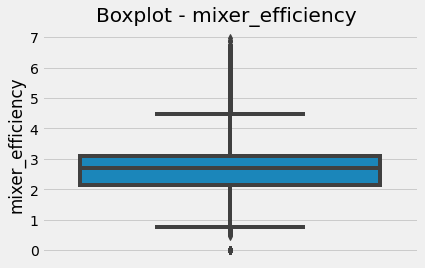

In [18]:
sns.boxplot(y= "mixer_efficiency",data = data)
plt.title('Boxplot - mixer_efficiency ')
plt.savefig("/content/drive/MyDrive/interviews/mixer.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


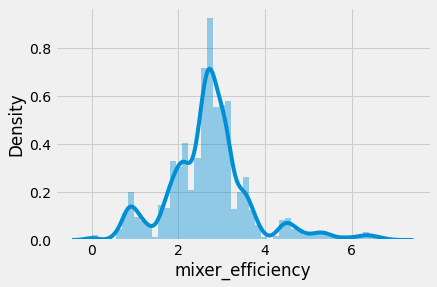

In [19]:
sns.distplot(data["mixer_efficiency"],kde=True)

In [20]:
# Log Transformation on the Mixer Efficiency
np.log1p(data["mixer_efficiency"]).quantile(np.arange(0,1.1,0.1))

0.0    0.000000
0.1    0.969074
0.2    1.119659
0.3    1.212987
0.4    1.277098
0.5    1.310244
0.6    1.340295
0.7    1.390617
0.8    1.426910
0.9    1.538966
1.0    2.075698
Name: mixer_efficiency, dtype: float64

In [21]:
#sns.distplot(np.square(data["mixer_efficiency"]),kde=True)

## Encoding Categorical Variables

In [22]:
def to_cat(df,cols):
  for col in cols:
    df[col] = df[col].astype("category")
  return df

In [23]:
cat_feats = ["manualinterruption","actual_batch","set_batch","Shift","tss","workcenter","plantlocalname","recipe"]

In [24]:
data = to_cat(data,cat_feats)

In [25]:
data[cat_feats].head()

manualinterruption actual_batch set_batch Shift tss   workcenter  \
0                  1            1         1     A   1  P1002_W0105   
1                  1            1        29     A   1  P1002_W0105   
2                  0            2        29     A   1  P1002_W0105   
3                  0            3        29     A   1  P1002_W0105   
4                  0            4        29     A   1  P1002_W0105   

  plantlocalname       recipe  
0         BNB105  XMT3317_105  
1         BNB105  XMT3317_105  
2         BNB105  XMT3317_105  
3         BNB105  XMT3317_105  
4         BNB105  XMT3317_105

In [26]:
data["workcenter_codes"] = data["workcenter"].cat.codes
data["plantlocalname_codes"] = data["plantlocalname"].cat.codes
data["recipe_codes"] = data["recipe"].cat.codes
data["shift_codes"] = data["Shift"].cat.codes

In [27]:
data.columns

Index(['localizedtimestamp', 'plantlocalname', 'workcenter', 'recipe',
       'set_batch', 'actual_batch', 'mixing_time', 'npttime',
       'mixingcycletime', 'setuptime', 'idle_time', 'nptpl', 'loading_time',
       'nptcs', 'drop_door_open_time', 'discharge_door_dwell_time',
       'manualinterruption', 'drop_door_close_time', 'ram_down_time',
       'ram_up_time', 'set_dump_temperature', 'batch_temperature',
       'set_dump_energy', 'mix_energy', 'total_weight', 'set_polymer_weight_1',
       'actual_polymer_weight1', 'set_polymer_weight_2',
       'actual_polymer_weight_3', 'set_polymer_weight_3',
       'actual_polymer_weight_2', 'set_polymer_weight_4',
       'actual_polymer_weight_4', 'carbonchargingrate (kg/sec)',
       'carbon_charging_time', 'carbon_weighing_time',
       'carbon_black_set_weight', 'carbon_black_act_weight', 'oil_set_weight',
       'oil_actual_weight', 'oil_charging_time', 'oil_weighing_time',
       'processoil_dust_stopinkg', 'lubeoil_dust_stop inkg', 'u

In [28]:
unknown_feats = ["actual_batch","set_batch"]
to_drop = ["mixingcycletime"]
num_feats = ["npttime","setuptime","idle_time","nptpl","loading_time","nptcs","drop_door_open_time","discharge_door_dwell_time",\
             "drop_door_close_time","ram_down_time","ram_up_time","set_dump_temperature","batch_temperature","set_dump_energy","mix_energy",\
             "set_polymer_weight_1","actual_polymer_weight1","set_polymer_weight_2","actual_polymer_weight_3","set_polymer_weight_3",\
             "actual_polymer_weight_2","set_polymer_weight_4","actual_polymer_weight_4","carbonchargingrate (kg/sec)",
             "carbon_charging_time","carbon_weighing_time","carbon_black_set_weight","carbon_black_act_weight","oil_set_weight","oil_actual_weight",\
             "oil_charging_time","oil_weighing_time","processoil_dust_stopinkg","lubeoil_dust_stop inkg"]

cat_feats = ["manualinterruption","actual_batch","set_batch","shift_codes","tss","workcenter_codes","plantlocalname_codes","recipe_codes"]

date_feats = ["localizedtimestamp","Shiftdate","utctimestamp"]

len(num_feats+cat_feats+date_feats)

45

In [29]:
#set(data.columns).difference(set(num_feats+cat_feats+date_feats))

## Distribution Plots for Numerical Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


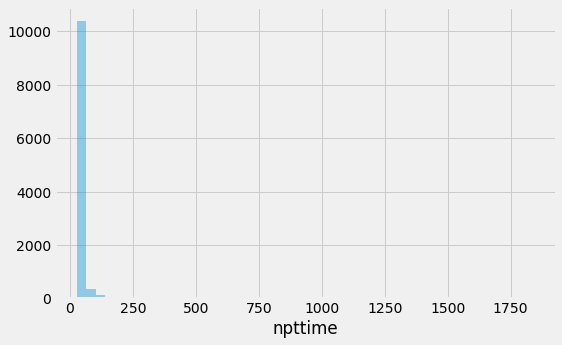

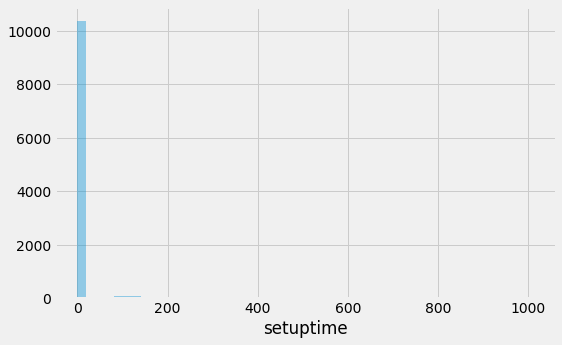

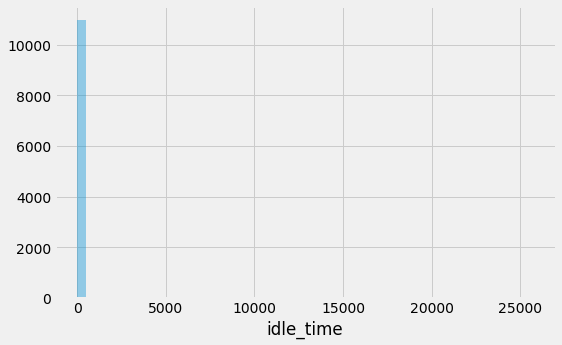

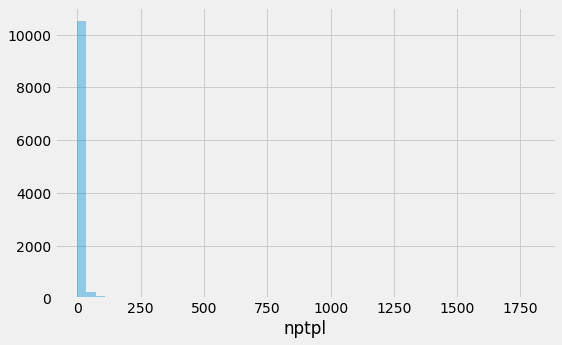

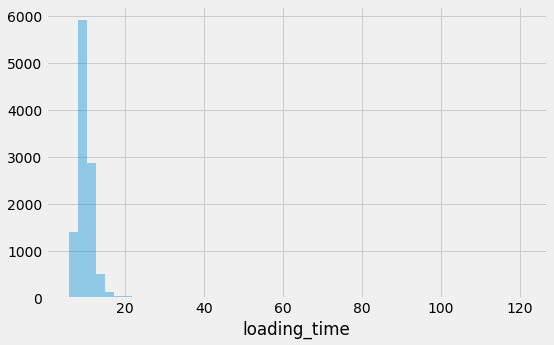

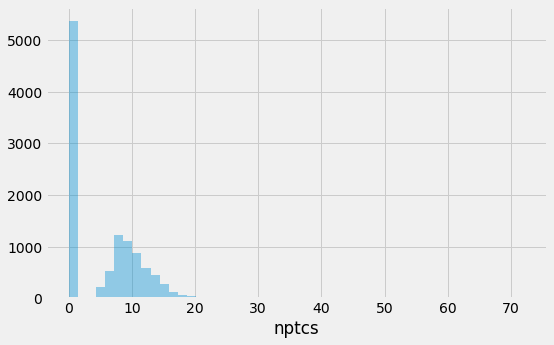

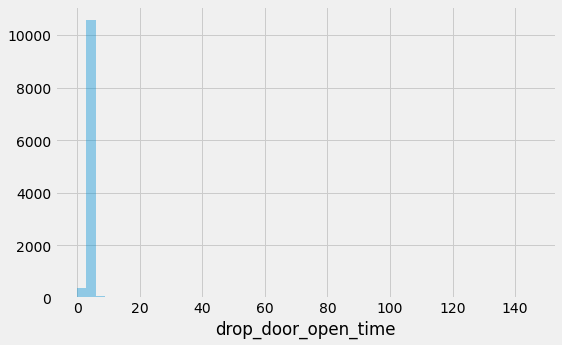

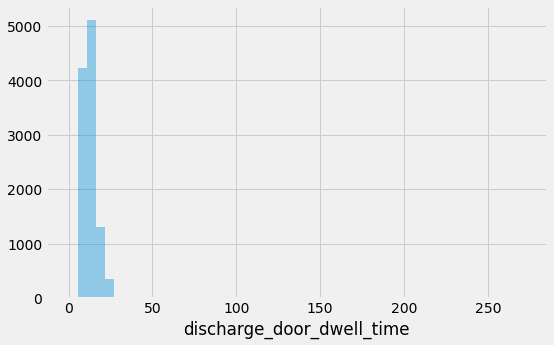

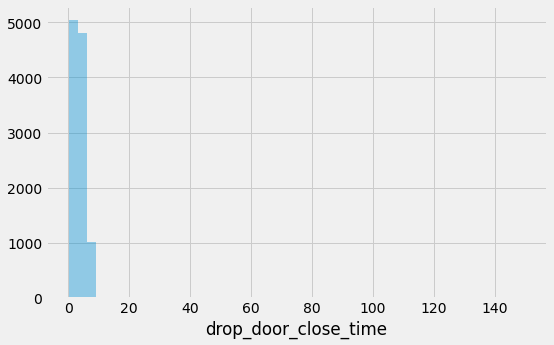

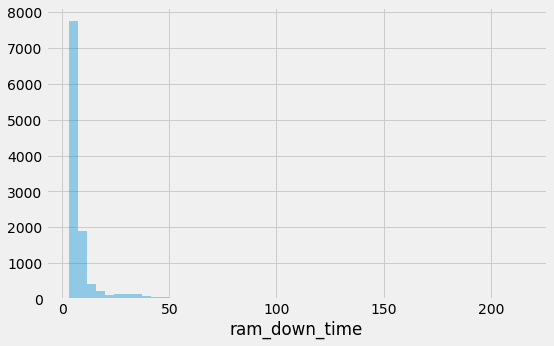

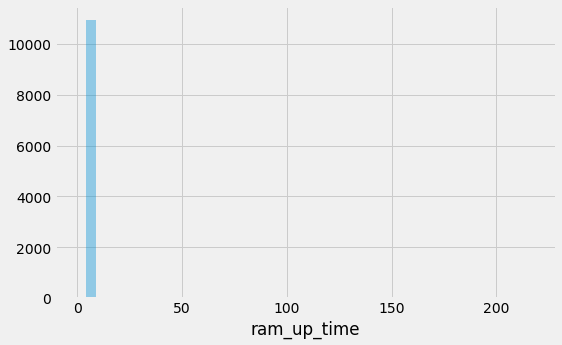

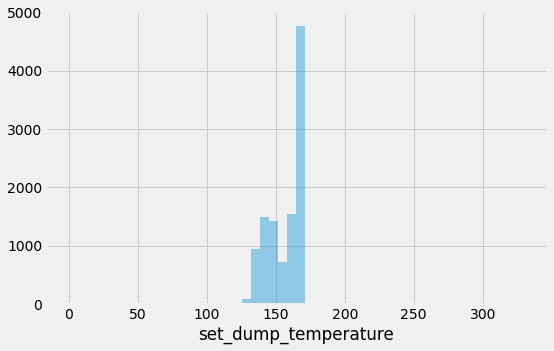

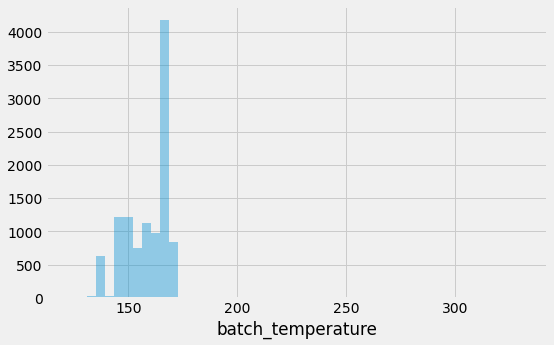

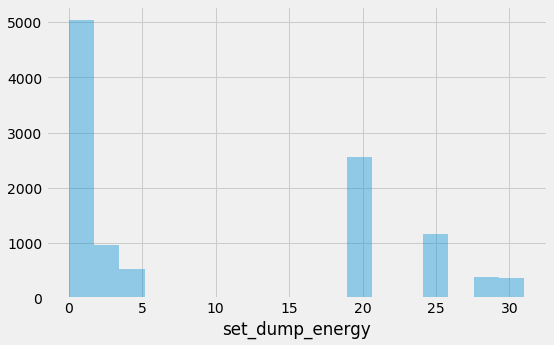

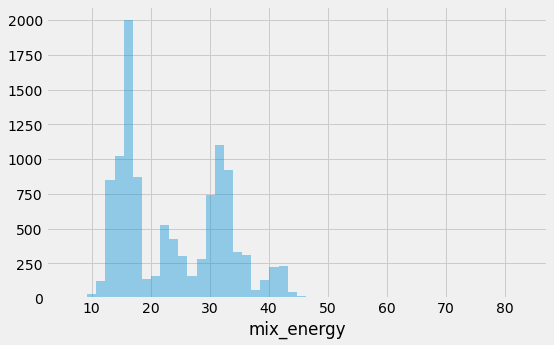

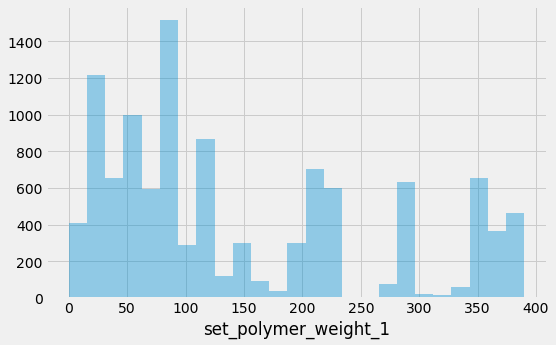

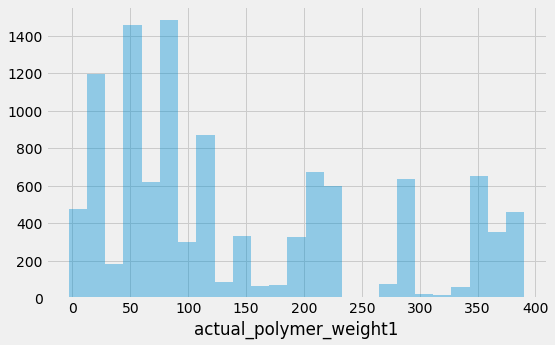

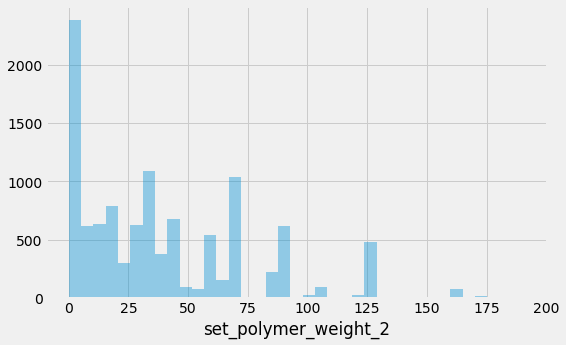

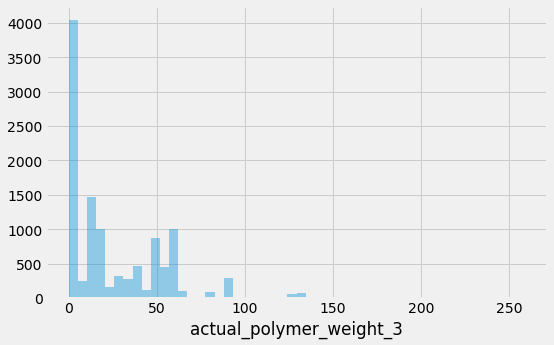

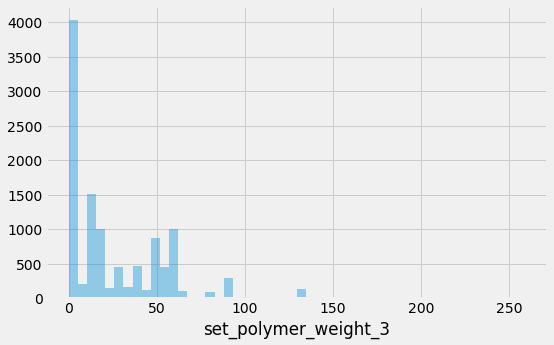

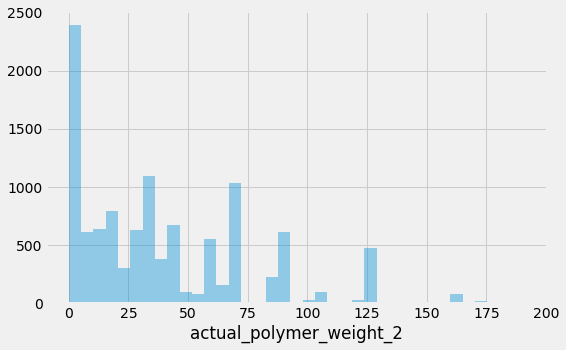

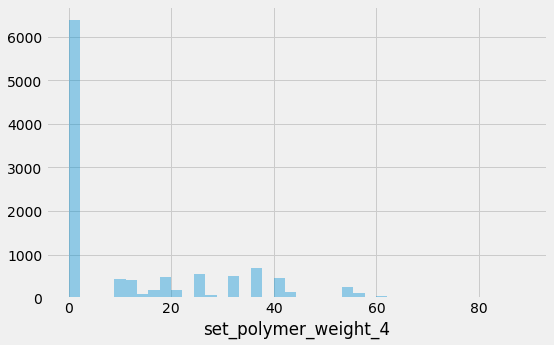

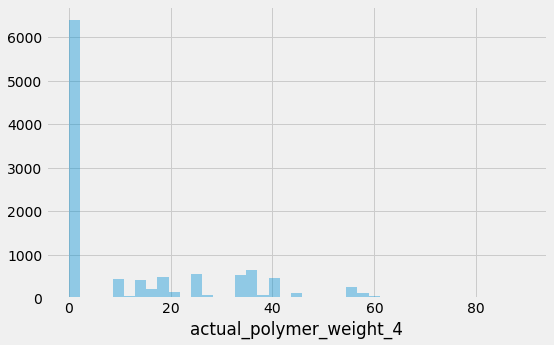

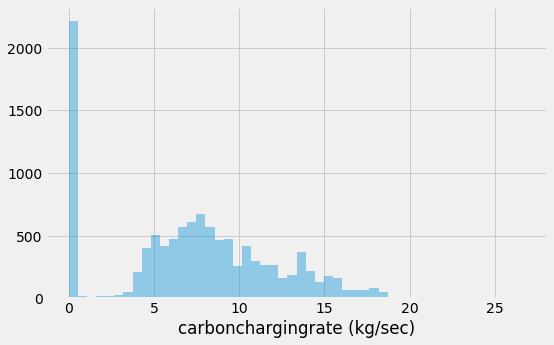

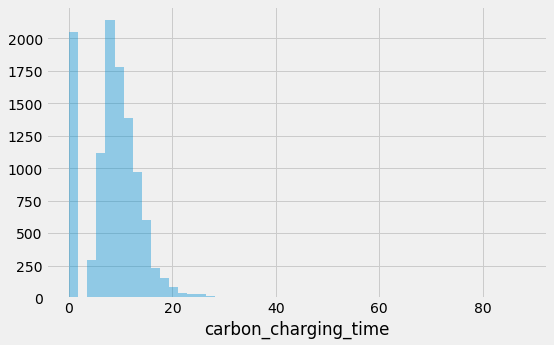

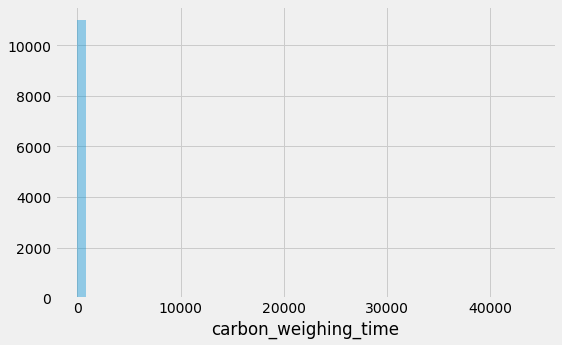

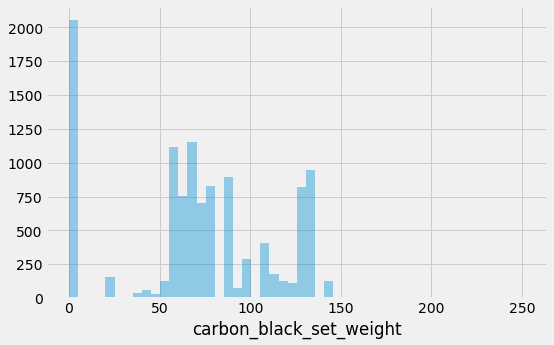

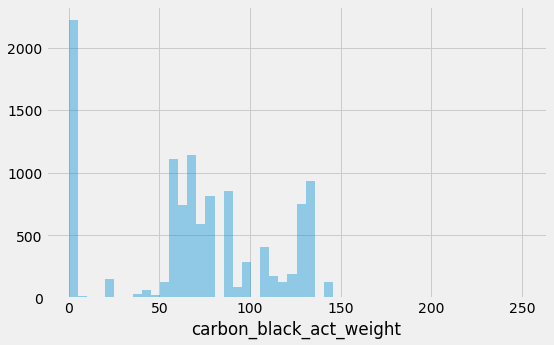

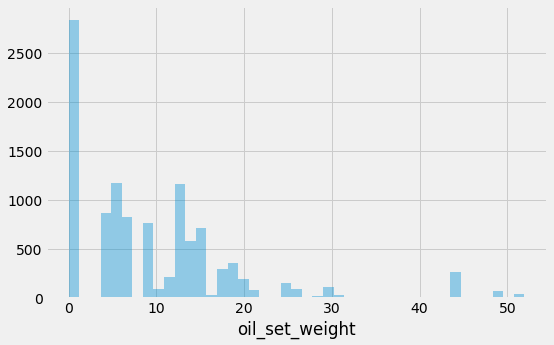

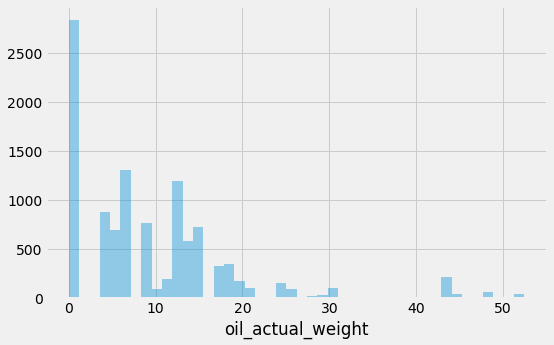

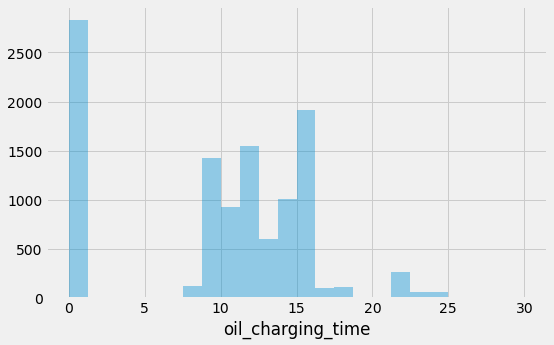

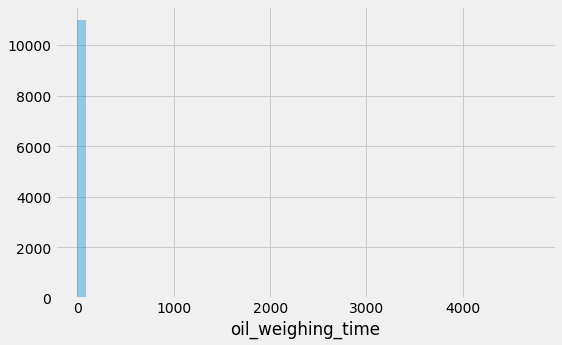

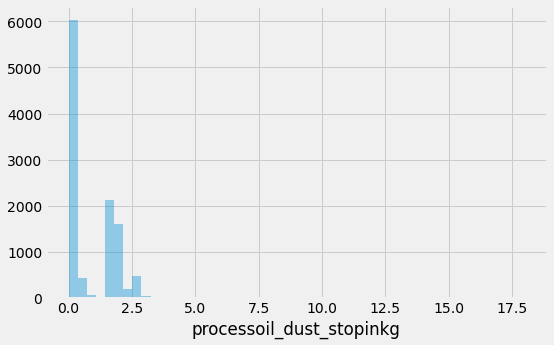

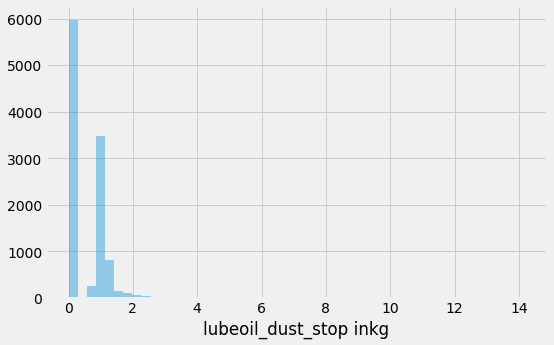

In [30]:
for i, col in enumerate(num_feats):
    plt.figure(i,figsize=(8,5))
    sns.distplot(data[col],kde=False)



In [31]:
# Create correlation matrix
corr_matrix = data[num_feats+to_drop].corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['nptpl',
 'actual_polymer_weight1',
 'set_polymer_weight_3',
 'actual_polymer_weight_2',
 'actual_polymer_weight_4',
 'carbon_black_act_weight',
 'oil_actual_weight']

In [32]:
filteredDf = corr_matrix[((corr_matrix >= .7) | (corr_matrix <= -.7)) & (corr_matrix !=1.000)]

In [33]:
filteredDf.unstack().sort_values().drop_duplicates()

processoil_dust_stopinkg     mix_energy                    -0.793226
                             set_dump_energy               -0.732794
set_dump_energy              mix_energy                     0.721716
processoil_dust_stopinkg     lubeoil_dust_stop inkg         0.765757
carbonchargingrate (kg/sec)  carbon_black_set_weight        0.827307
oil_charging_time            oil_actual_weight              0.836573
                             oil_set_weight                 0.839166
set_dump_temperature         batch_temperature              0.842112
carbon_black_act_weight      carbonchargingrate (kg/sec)    0.852398
carbon_black_set_weight      carbon_black_act_weight        0.975545
set_polymer_weight_1         actual_polymer_weight1         0.983888
npttime                      nptpl                          0.984152
set_polymer_weight_3         actual_polymer_weight_3        0.996355
oil_actual_weight            oil_set_weight                 0.996743
actual_polymer_weight_2      set_p

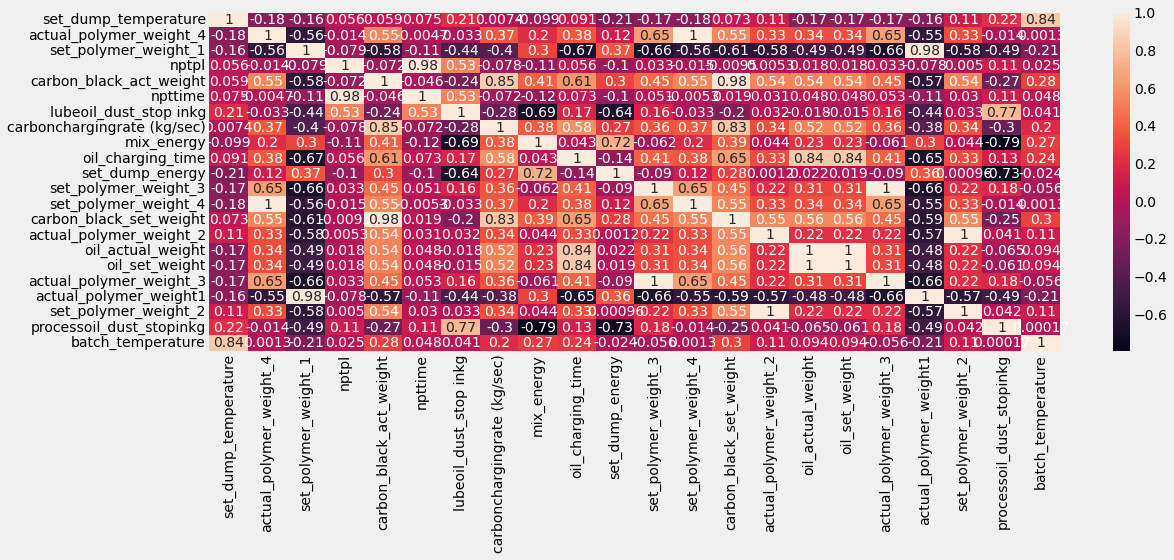

In [34]:
t1 = filteredDf.unstack().sort_values().drop_duplicates().to_frame().reset_index().level_0.tolist() 
t2 = filteredDf.unstack().sort_values().drop_duplicates().to_frame().reset_index().level_1.tolist() 
plt.figure(figsize = (18,8))
sns.heatmap(data[list(set(t1+t2))].corr(),annot=True)
plt.tight_layout()
plt.savefig(RESULTS_DIR/"corr.png")

## Boxplot of Categorical Variables vs Mixer Efficiency

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

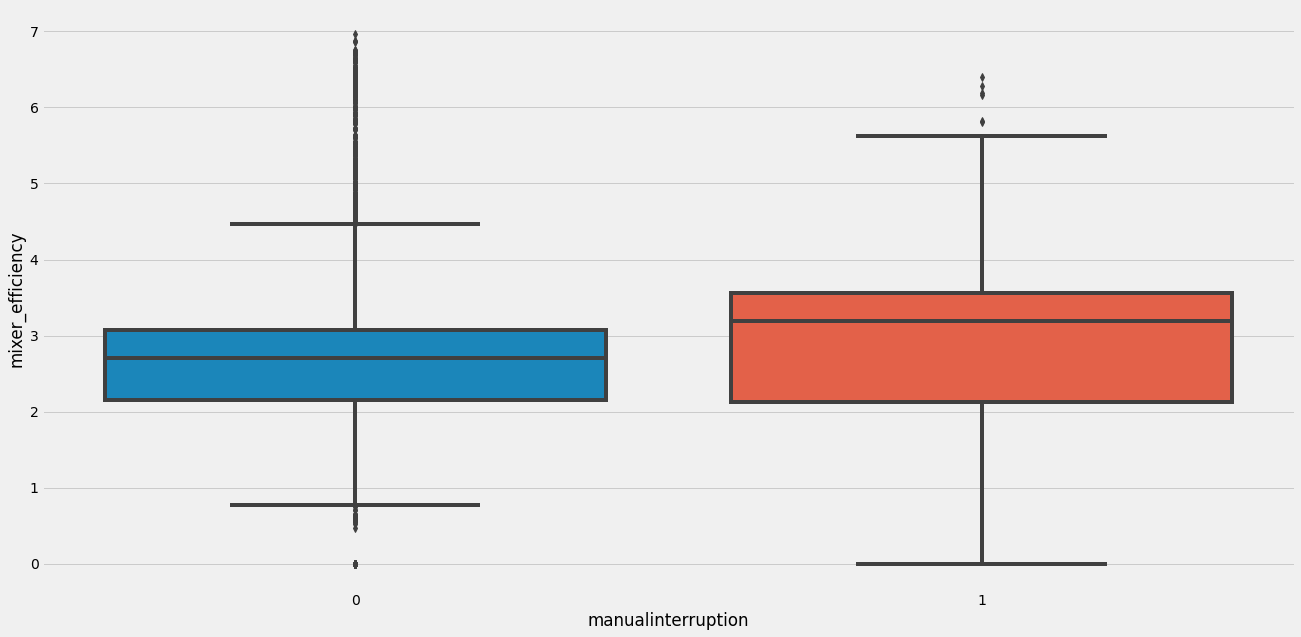

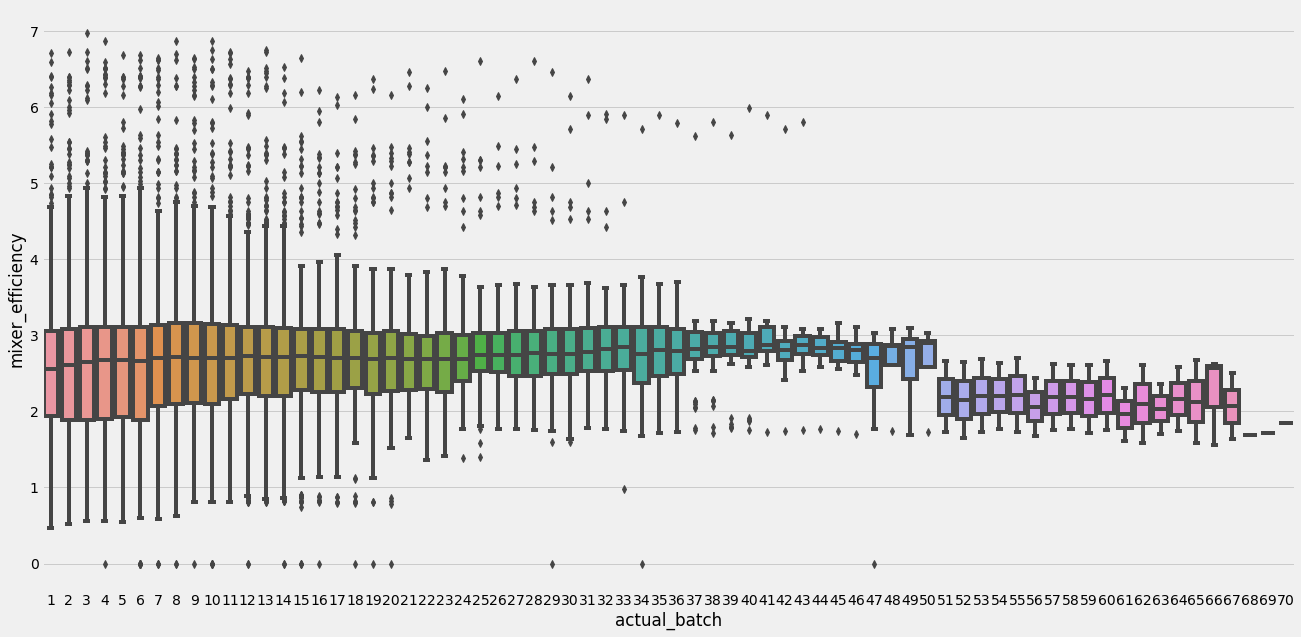

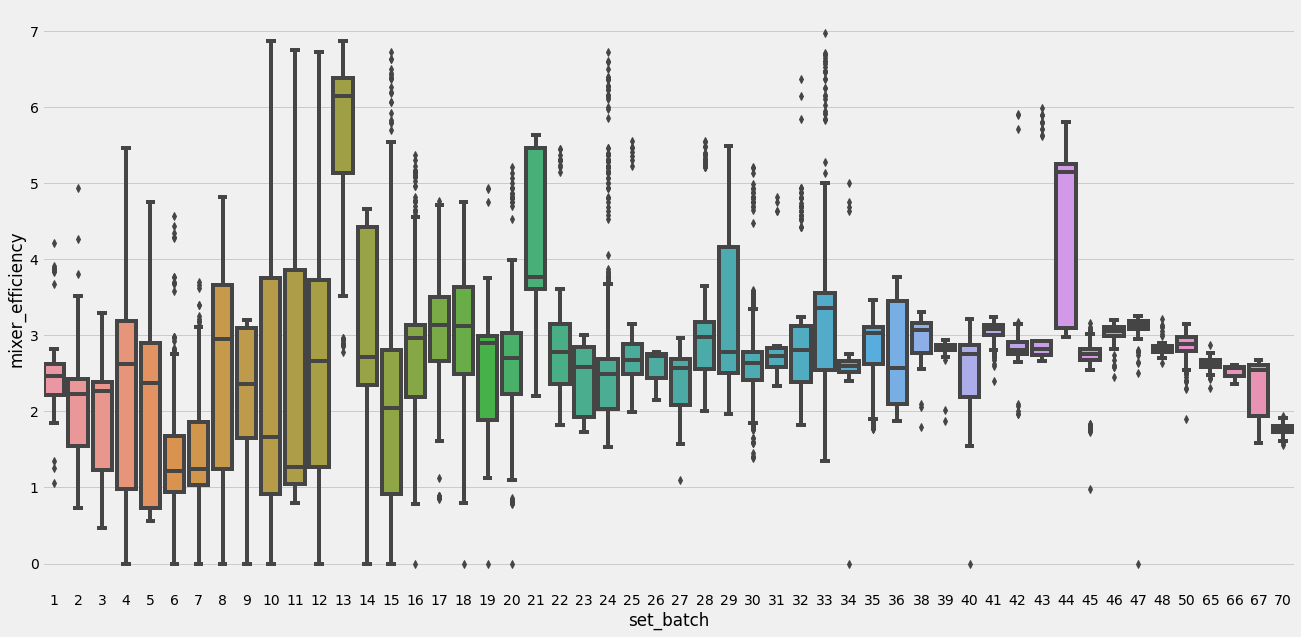

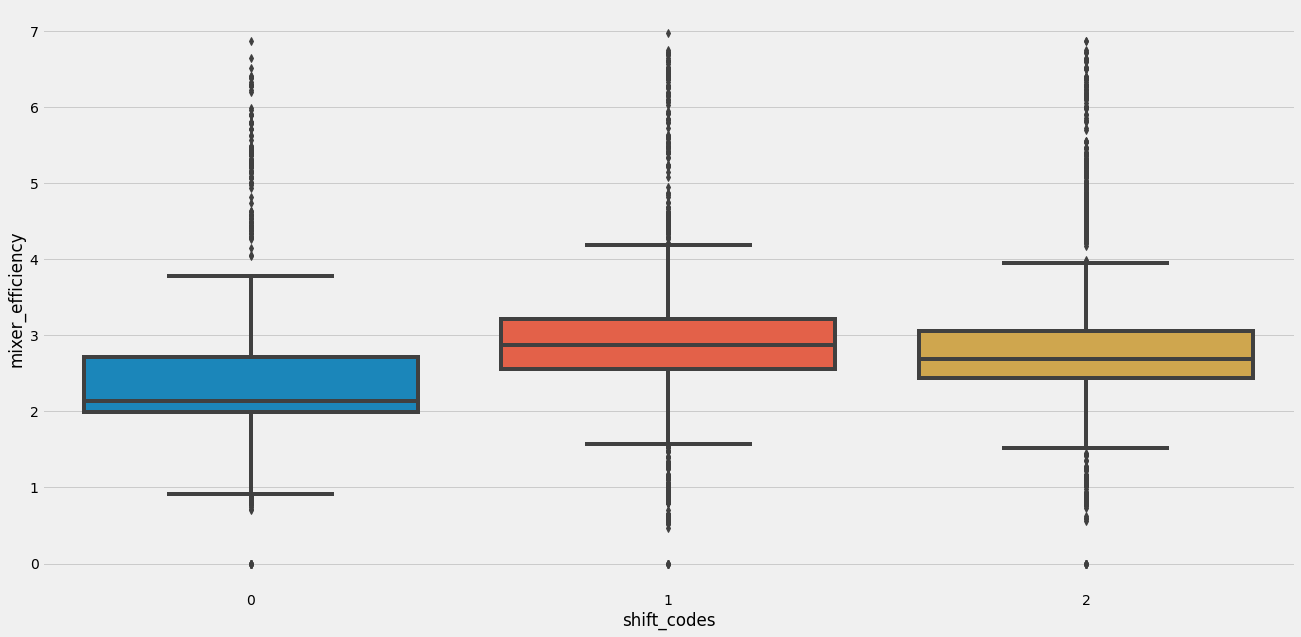

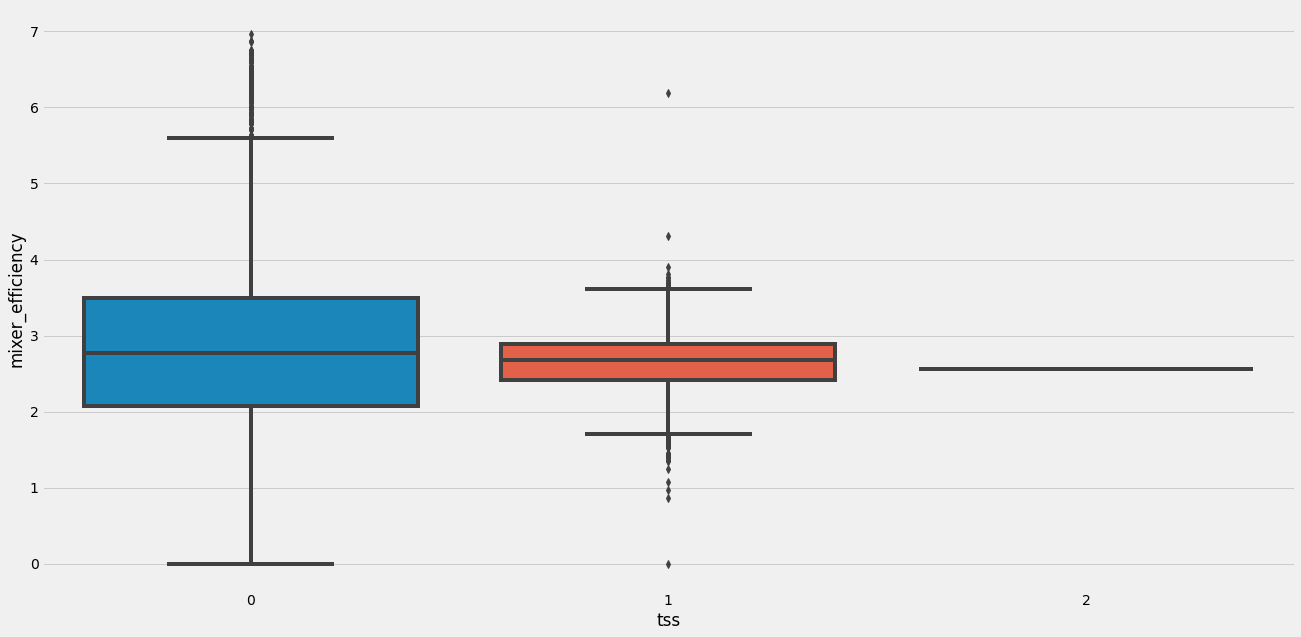

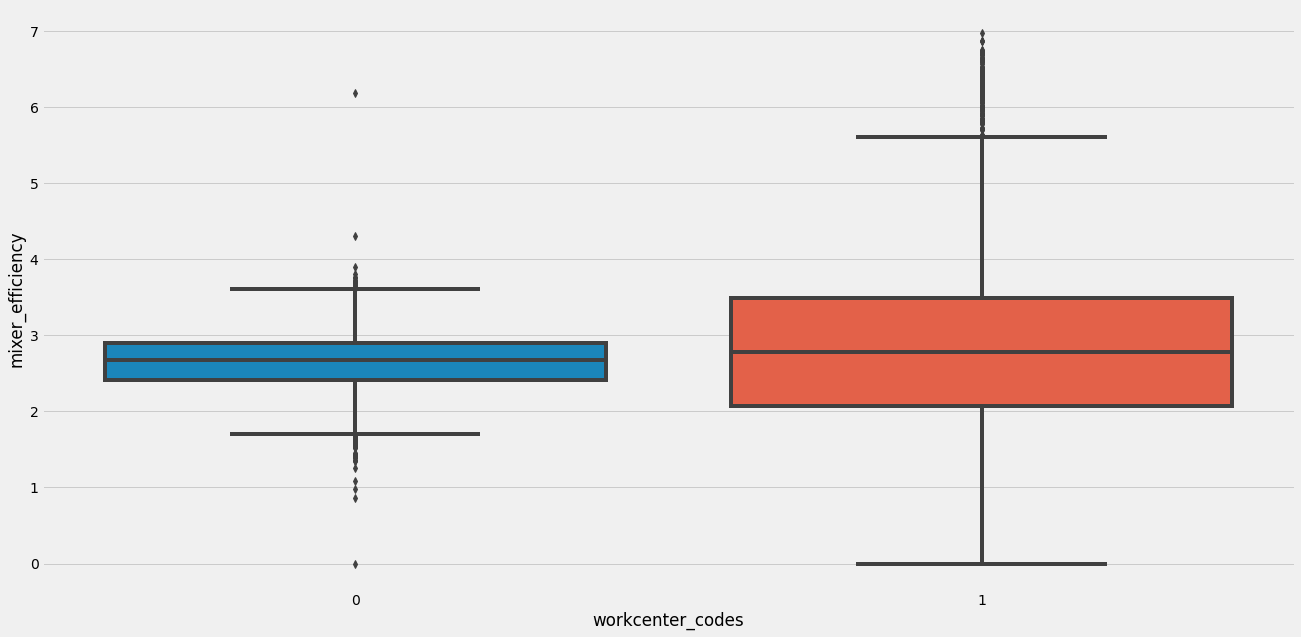

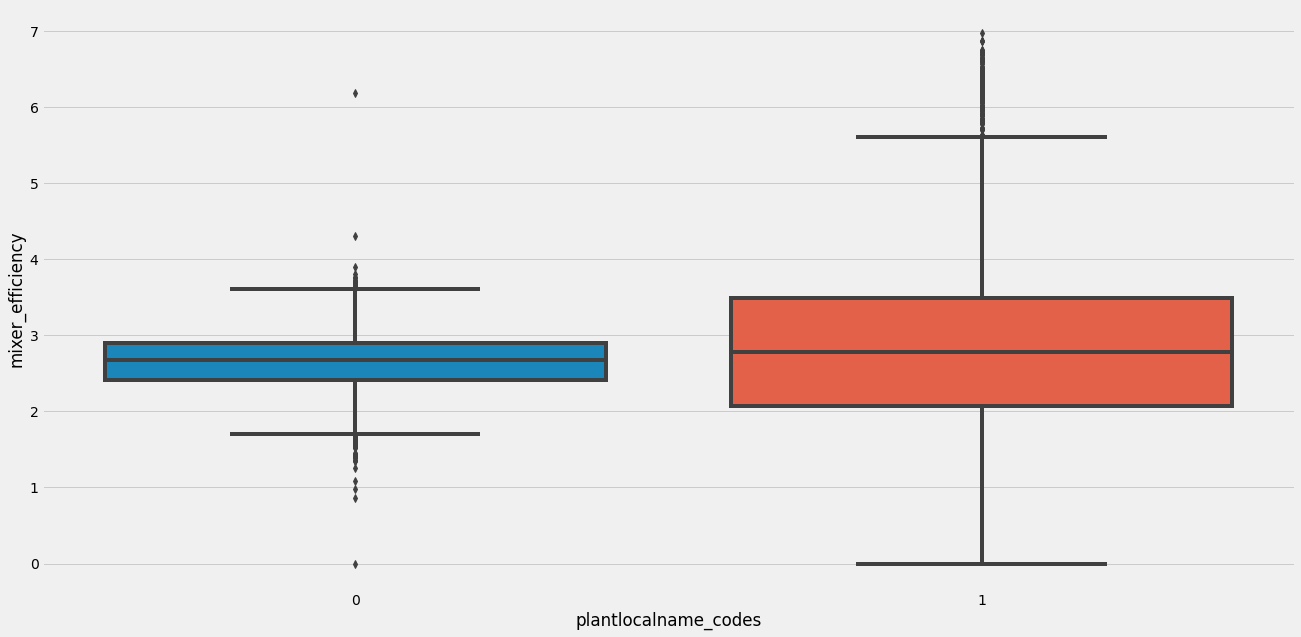

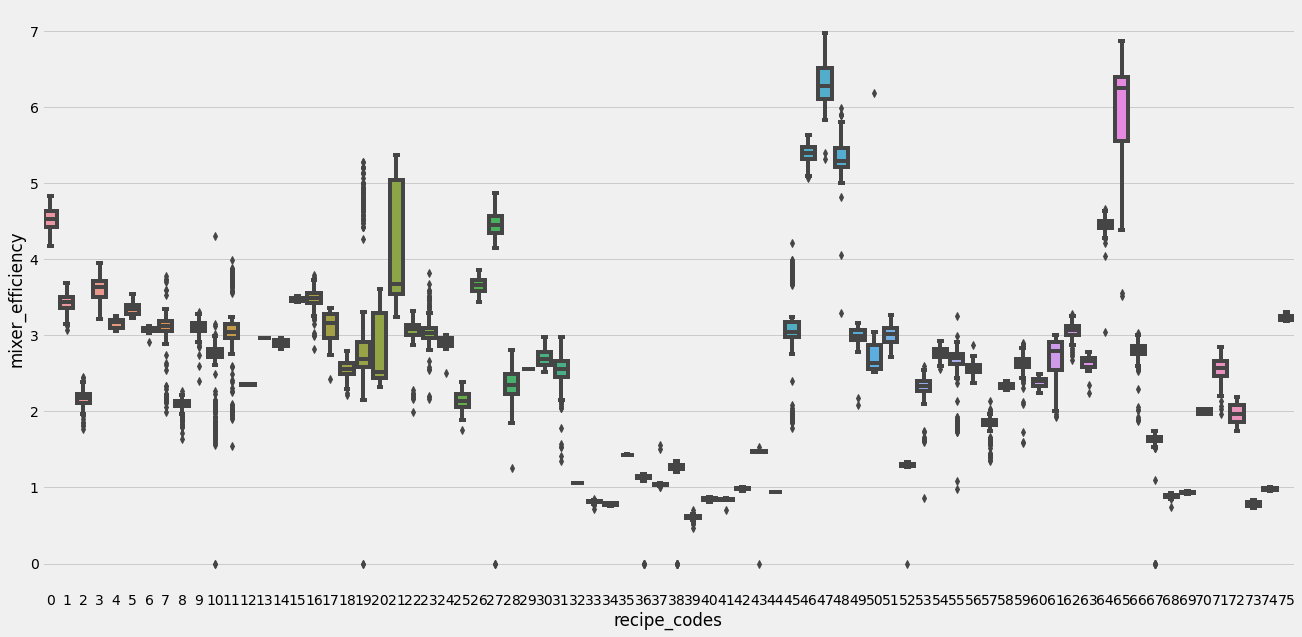

In [35]:


for i, col in enumerate(cat_feats):
    plt.figure(i,figsize=(20,10))
    sns.boxplot(col,data["mixer_efficiency"],data=data)



## ScattterPlot between Numerical Features vs Mixing Efficiency

In [36]:
data.columns

Index(['localizedtimestamp', 'plantlocalname', 'workcenter', 'recipe',
       'set_batch', 'actual_batch', 'mixing_time', 'npttime',
       'mixingcycletime', 'setuptime', 'idle_time', 'nptpl', 'loading_time',
       'nptcs', 'drop_door_open_time', 'discharge_door_dwell_time',
       'manualinterruption', 'drop_door_close_time', 'ram_down_time',
       'ram_up_time', 'set_dump_temperature', 'batch_temperature',
       'set_dump_energy', 'mix_energy', 'total_weight', 'set_polymer_weight_1',
       'actual_polymer_weight1', 'set_polymer_weight_2',
       'actual_polymer_weight_3', 'set_polymer_weight_3',
       'actual_polymer_weight_2', 'set_polymer_weight_4',
       'actual_polymer_weight_4', 'carbonchargingrate (kg/sec)',
       'carbon_charging_time', 'carbon_weighing_time',
       'carbon_black_set_weight', 'carbon_black_act_weight', 'oil_set_weight',
       'oil_actual_weight', 'oil_charging_time', 'oil_weighing_time',
       'processoil_dust_stopinkg', 'lubeoil_dust_stop inkg', 'u

In [37]:
#data[data.workcenter_codes==1].describe()

In [38]:
tab = []
for num in cat_feats:
   print(num)
   tab.append((num,data[data.workcenter_codes==0][num].nunique()))
tab1 = []
for num in cat_feats:
   tab1.append((num,data[data.workcenter_codes==1][num].nunique()))

manualinterruption
actual_batch
set_batch
shift_codes
tss
workcenter_codes
plantlocalname_codes
recipe_codes


In [39]:
pd.concat([pd.DataFrame(i) for i in [tab,tab1]],axis=1)

0   1                     0   1
0    manualinterruption   2    manualinterruption   2
1          actual_batch  70          actual_batch  47
2             set_batch  45             set_batch  45
3           shift_codes   3           shift_codes   3
4                   tss   2                   tss   1
5      workcenter_codes   1      workcenter_codes   1
6  plantlocalname_codes   1  plantlocalname_codes   1
7          recipe_codes  26          recipe_codes  61

In [40]:
# tab = []
# for num in num_feats:
#    tab.append((num,data[data.workcenter_codes==0][num].nunique()))
# tab1 = []
# for num in num_feats:
#    tab1.append((num,data[data.workcenter_codes==1][num].nunique()))

In [41]:
#pd.concat([pd.DataFrame(i) for i in [tab,tab1]],axis=1)

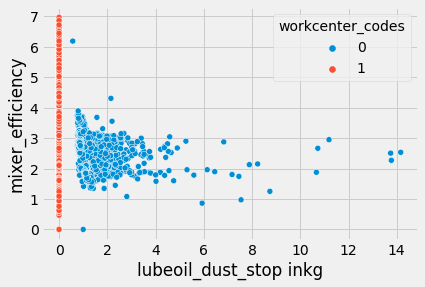

In [42]:
# lubeoil_dust_stop inkg is all 0s for a Workcentre encoded as 1.
sns.scatterplot(x = "lubeoil_dust_stop inkg",y = data["mixer_efficiency"],data=data,hue = 'workcenter_codes')

In [43]:
import scipy
from scipy.cluster  import hierarchy as hc

In [44]:
corr = np.round(scipy.stats.spearmanr(data[num_feats+cat_feats]).correlation, 4)

In [45]:
corr[corr<0]=0
corr[np.isnan(corr)]=0

<Figure size 720x432 with 0 Axes>

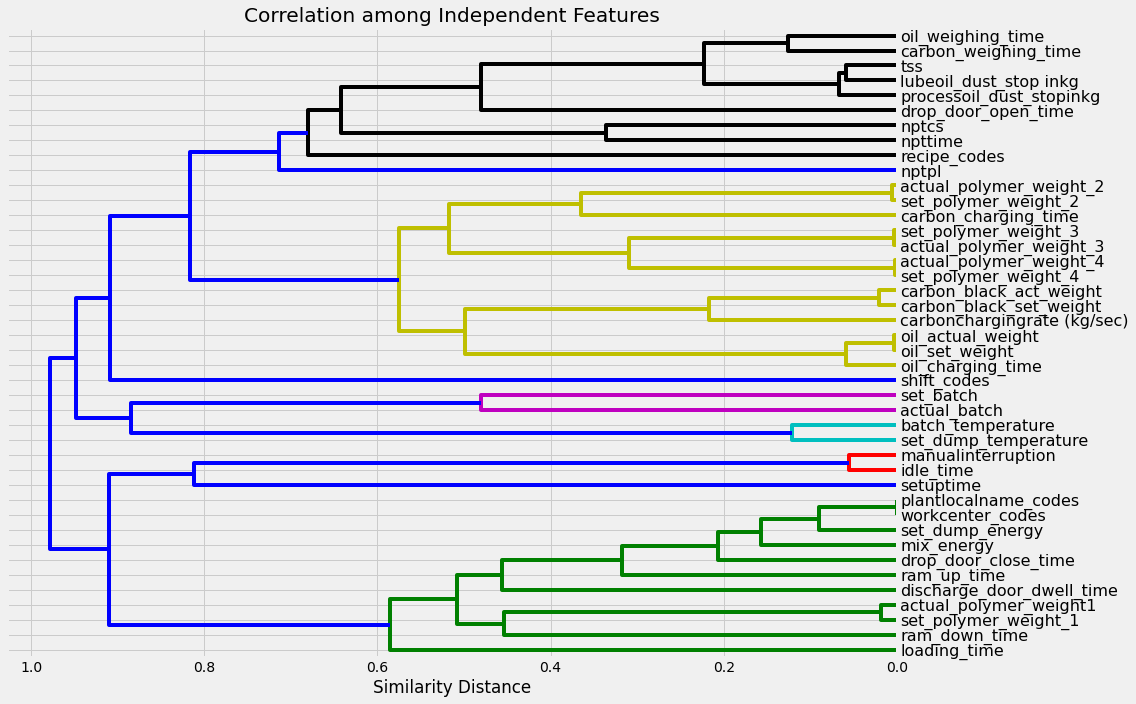

In [46]:
from pandas._libs.algos import pad_inplace
#corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
plt.figure(figsize=(10,6))
corr_condensed = hc.distance.squareform(1-corr,checks=False)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
plt.title("Correlation among Independent Features")
plt.xlabel("Similarity Distance")
dendrogram = hc.dendrogram(z, labels=data[num_feats+cat_feats].columns, orientation='left', leaf_font_size=16)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/interviews/corr1.png",pad_inches = 0.3)
plt.show()


In [47]:
cat_feats

['manualinterruption',
 'actual_batch',
 'set_batch',
 'shift_codes',
 'tss',
 'workcenter_codes',
 'plantlocalname_codes',
 'recipe_codes']

In [48]:
num_feats

['npttime',
 'setuptime',
 'idle_time',
 'nptpl',
 'loading_time',
 'nptcs',
 'drop_door_open_time',
 'discharge_door_dwell_time',
 'drop_door_close_time',
 'ram_down_time',
 'ram_up_time',
 'set_dump_temperature',
 'batch_temperature',
 'set_dump_energy',
 'mix_energy',
 'set_polymer_weight_1',
 'actual_polymer_weight1',
 'set_polymer_weight_2',
 'actual_polymer_weight_3',
 'set_polymer_weight_3',
 'actual_polymer_weight_2',
 'set_polymer_weight_4',
 'actual_polymer_weight_4',
 'carbonchargingrate (kg/sec)',
 'carbon_charging_time',
 'carbon_weighing_time',
 'carbon_black_set_weight',
 'carbon_black_act_weight',
 'oil_set_weight',
 'oil_actual_weight',
 'oil_charging_time',
 'oil_weighing_time',
 'processoil_dust_stopinkg',
 'lubeoil_dust_stop inkg']

## Drop Highly Correlated Features

In [49]:
to_drop_cor_feats = ["manualinterruption","plantlocalname_codes"]

In [50]:
cat_feats = [i for i in cat_feats if i not in to_drop_cor_feats]

In [51]:
cat_feats

['actual_batch',
 'set_batch',
 'shift_codes',
 'tss',
 'workcenter_codes',
 'recipe_codes']

# Train Test Split

In [52]:
data = data.sort_values(by = "localizedtimestamp",ascending=True)

In [53]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1000
n_trn = len(data)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_test = split_vals(data, n_trn)
y_train, y_test = split_vals(data['mixer_efficiency'], n_trn)

print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(9998, 53) (9998,)
(1000, 53) (1000,)


In [54]:
n_valid = 1000
n_trn = len(X_train)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_val = split_vals(X_train, n_trn)
y_train, y_val = split_vals(y_train, n_trn)

print(X_train.shape, y_train.shape)
print(X_val.shape,  y_val.shape)

(8998, 53) (8998,)
(1000, 53) (1000,)


In [55]:
X_train.shape,X_val.shape,X_test.shape

((8998, 53), (1000, 53), (1000, 53))

In [56]:
X_train.localizedtimestamp.min(),X_train.localizedtimestamp.max()

(Timestamp('2022-04-01 07:01:06.530000'),
 Timestamp('2022-04-13 15:44:09.923000'))

In [57]:
X_val.localizedtimestamp.min(), X_val.localizedtimestamp.max()

(Timestamp('2022-04-13 15:44:59.427000'),
 Timestamp('2022-04-14 22:10:24.810000'))

In [58]:
X_test.localizedtimestamp.min(),X_test.localizedtimestamp.max()

(Timestamp('2022-04-14 22:12:47.850000'),
 Timestamp('2022-04-17 10:35:38.317000'))

# Feature Selection

In [59]:

from sklearn.feature_selection import GenericUnivariateSelect, f_regression, mutual_info_regression

In [60]:
def GenericUnivariateSelect_(score_fnc, X,y):
    selector = GenericUnivariateSelect(score_fnc)
    selector.fit(X,y)
    if score_fnc.__name__ == 'f_regression':
      scores = selector.scores_
      scores /= scores.max()
      #-Log(p-score)
      univariate_cols = list(zip(X.columns,selector.pvalues_))
      uni_df = pd.DataFrame(univariate_cols,columns = ['f_names','pvalue_norm']).sort_values(by = 'pvalue_norm',ascending=False)
      uni_df.plot('f_names', 'pvalue_norm', 'barh', figsize=(12,X.shape[1]/4.2), legend=False)
    else:
      scores = selector.scores_
      univariate_cols = list(zip(X.columns,selector.scores_))
      uni_df = pd.DataFrame(univariate_cols,columns = ['f_names','mutual_info']).sort_values(by = 'mutual_info',ascending=False)
      uni_df.plot('f_names', 'mutual_info', 'barh', figsize=(12,X.shape[1]/4.2), legend=False)

    return uni_df

f_names  pvalue_norm
2                     idle_time     0.729260
0                       npttime     0.695886
17         set_polymer_weight_2     0.589188
13              set_dump_energy     0.495269
20      actual_polymer_weight_2     0.463257
4                  loading_time     0.444843
1                     setuptime     0.049653
25         carbon_weighing_time     0.005192
10                  ram_up_time     0.000272
23  carbonchargingrate (kg/sec)     0.000187

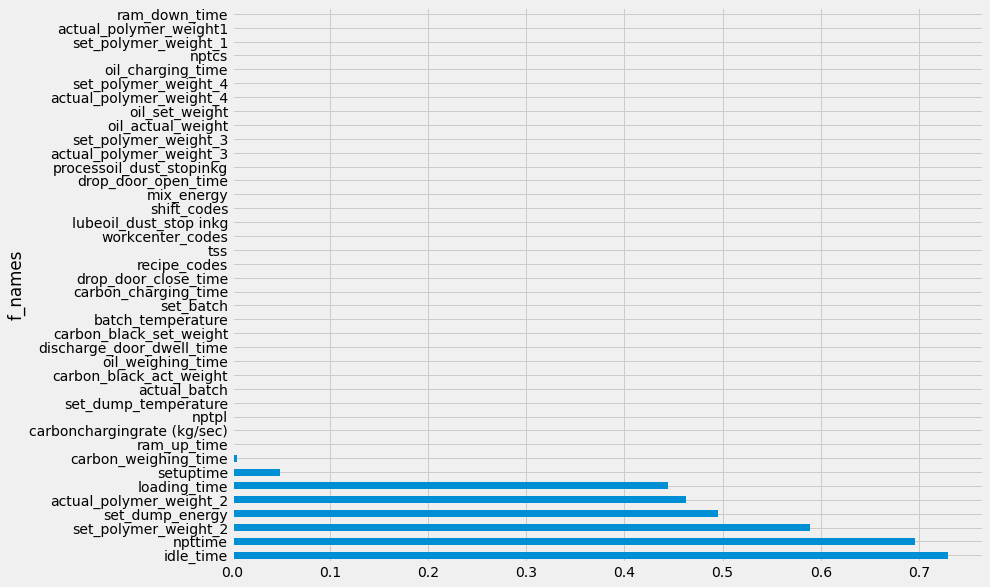

In [61]:
scores = GenericUnivariateSelect_(f_regression,X_train[num_feats+cat_feats],y_train)
scores[:10]

f_names  mutual_info
16   actual_polymer_weight1     2.068123
39             recipe_codes     2.058678
15     set_polymer_weight_1     2.056255
17     set_polymer_weight_2     1.860876
26  carbon_black_set_weight     1.837037
27  carbon_black_act_weight     1.788966
20  actual_polymer_weight_2     1.700289
28           oil_set_weight     1.661870
29        oil_actual_weight     1.608018
14               mix_energy     1.461977

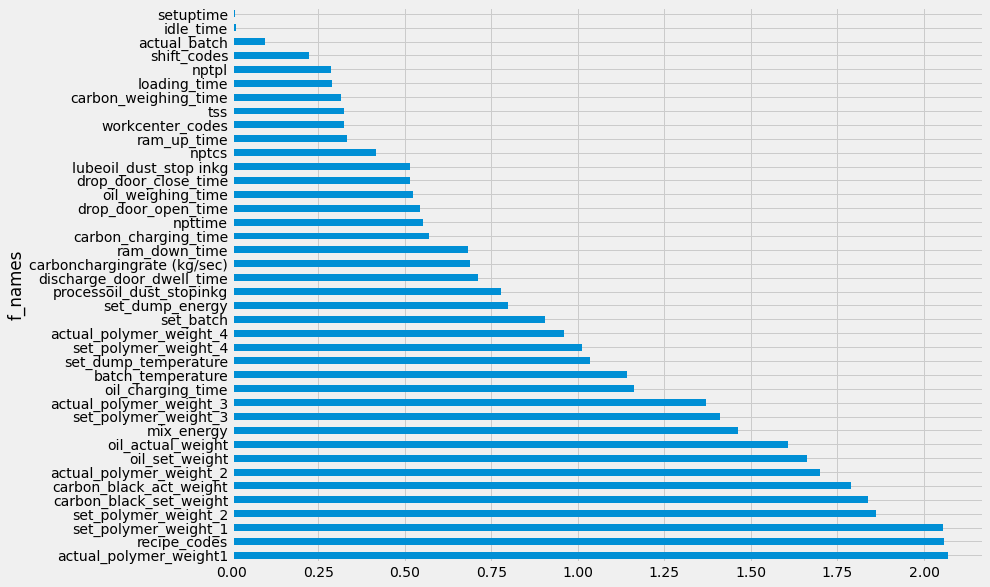

In [62]:
scores = GenericUnivariateSelect_(mutual_info_regression,X_train[num_feats+cat_feats],y_train)
scores[:10]

# Tree Model Rules

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [64]:
np.random.seed(123)
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X_train[num_feats+cat_feats],y_train)


DecisionTreeRegressor(max_depth=3)

In [65]:
dot_data = export_graphviz(tree,filled = True,rounded = True,
                          feature_names = X_train[num_feats+cat_feats].columns,
                          out_file  =None)

In [66]:
graph = graph_from_dot_data(dot_data)

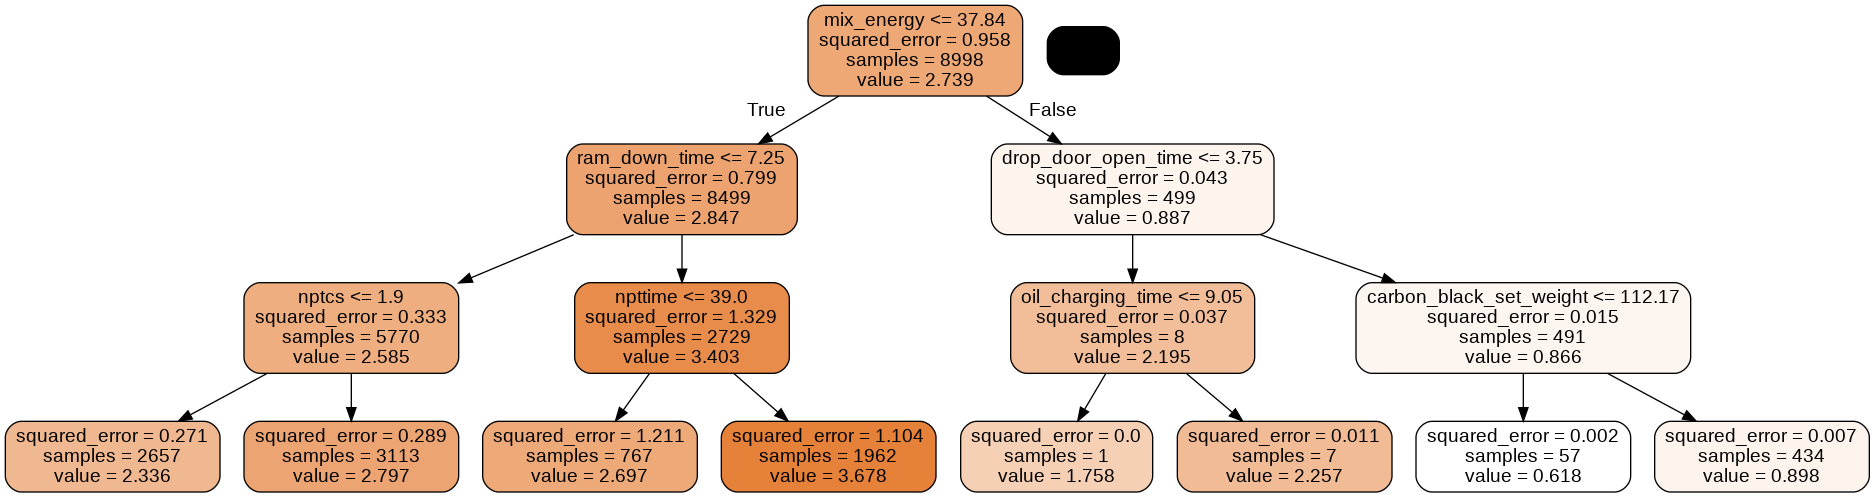

In [67]:
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png',height =800,width = 2000)

In [68]:
from sklearn.model_selection import cross_validate,KFold
from sklearn.metrics import make_scorer,mean_squared_error,r2_score

In [69]:
scorer_r2 = make_scorer(r2_score, greater_is_better=True)
scorer_mean_squared_error = make_scorer(mean_squared_error, greater_is_better=False)

In [70]:
score = {'r2' :scorer_r2,
        'squared_loss' :scorer_mean_squared_error}

In [71]:

np.random.seed(123)
model = DecisionTreeRegressor(criterion="squared_error",
                               max_depth=3)

In [72]:
# 10 fold cross validation
cv_score = cross_validate(model, 
                           X_train[num_feats+cat_feats],
                           y_train,
                           cv = KFold(10),
                            scoring =score)


In [73]:

pd.DataFrame(cv_score)

fit_time  score_time   test_r2  test_squared_loss
0  0.050413    0.003660  0.459773          -0.445639
1  0.043418    0.003284  0.555867          -0.366895
2  0.045429    0.003620  0.277687          -0.901094
3  0.043219    0.003556  0.255222          -0.711769
4  0.046766    0.004943  0.495272          -0.473479
5  0.048520    0.003270  0.654205          -0.312466
6  0.050480    0.003697  0.402196          -0.431019
7  0.041118    0.003406  0.619300          -0.359954
8  0.040220    0.003283  0.393511          -0.669843
9  0.042255    0.003571  0.371979          -0.528253

In [74]:
np.random.seed(123)
rf=RandomForestRegressor(n_estimators=30,oob_score=True,min_samples_leaf=3)
rf_model=rf.fit(X_train[num_feats+cat_feats],y_train)
#%prun
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


# Feature Importance

In [75]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [76]:
fi = rf_feat_importance(rf_model, X_train[num_feats+cat_feats]); fi[:30]

cols       imp
14                   mix_energy  0.234006
9                 ram_down_time  0.157024
16       actual_polymer_weight1  0.130547
39                 recipe_codes  0.081308
0                       npttime  0.060718
5                         nptcs  0.042833
15         set_polymer_weight_1  0.040674
26      carbon_black_set_weight  0.038045
11         set_dump_temperature  0.037235
27      carbon_black_act_weight  0.027417
12            batch_temperature  0.027213
6           drop_door_open_time  0.011902
23  carbonchargingrate (kg/sec)  0.011635
29            oil_actual_weight  0.010901
35                    set_batch  0.008584
28               oil_set_weight  0.008545
20      actual_polymer_weight_2  0.008530
24         carbon_charging_time  0.008069
17         set_polymer_weight_2  0.007749
32     processoil_dust_stopinkg  0.007202
36                  shift_codes  0.006983
7     discharge_door_dwell_time  0.005871
30            oil_charging_time  0.005194
33       lubeoil_dust_stop inkg  0.004745
19         set_polymer_weight_3  0.004276
3                         nptpl  0.004257
4                  loading_time  0.003037
13              set_dump_energy  0.001176
22      actual_polymer_weight_4  0.001136
18      actual_polymer_weight_3  0.000903

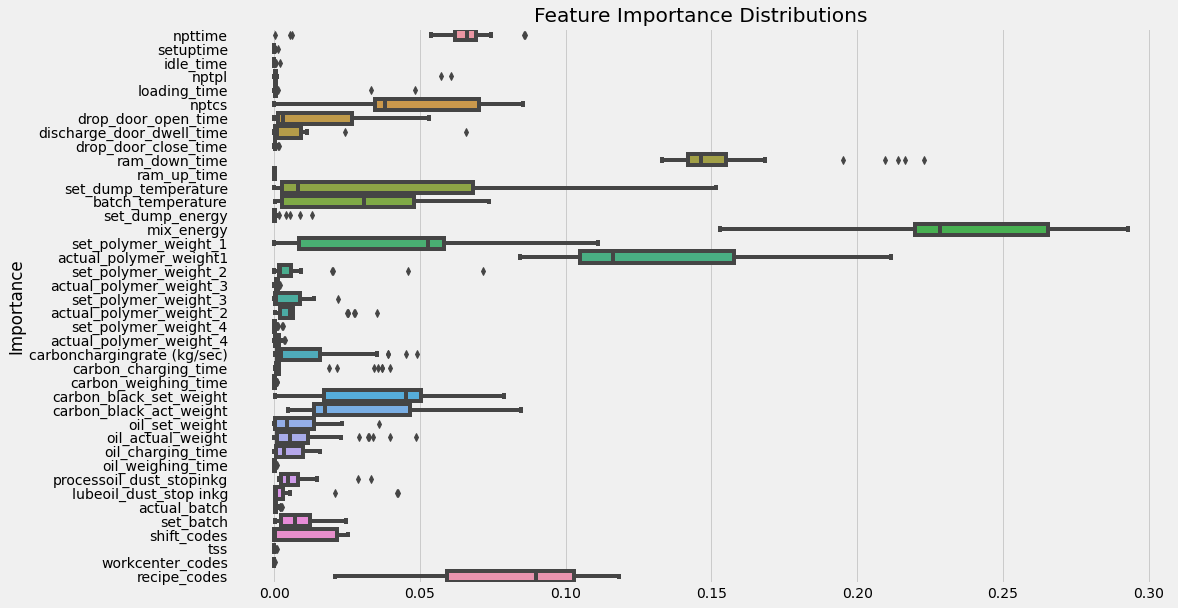

In [77]:
# get the feature importances from each tree and then visualize the
# distributions as boxplots
plt.figure(figsize=(15,X_train[num_feats+cat_feats].shape[1]/4.2))
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     rf],
                               columns=X_train[num_feats+cat_feats].columns)

(sns.boxplot(data=all_feat_imp_df,orient="h")
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));

In [78]:
to_keep_cols = fi[fi.imp>0.005].cols.tolist()
to_keep_cols

['mix_energy',
 'ram_down_time',
 'actual_polymer_weight1',
 'recipe_codes',
 'npttime',
 'nptcs',
 'set_polymer_weight_1',
 'carbon_black_set_weight',
 'set_dump_temperature',
 'carbon_black_act_weight',
 'batch_temperature',
 'drop_door_open_time',
 'carbonchargingrate (kg/sec)',
 'oil_actual_weight',
 'set_batch',
 'oil_set_weight',
 'actual_polymer_weight_2',
 'carbon_charging_time',
 'set_polymer_weight_2',
 'processoil_dust_stopinkg',
 'shift_codes',
 'discharge_door_dwell_time',
 'oil_charging_time']

In [79]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

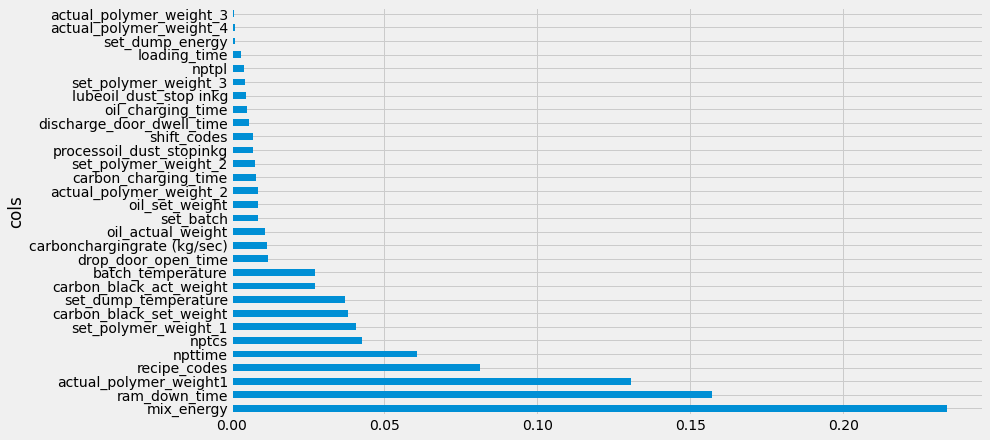

In [80]:
plot_fi(fi[:30]);

In [81]:
np.random.seed(123)
rf=RandomForestRegressor(n_estimators=30,oob_score=True,min_samples_leaf=3)
rf_model_keep=rf.fit(X_train[to_keep_cols],y_train)
#%prun
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


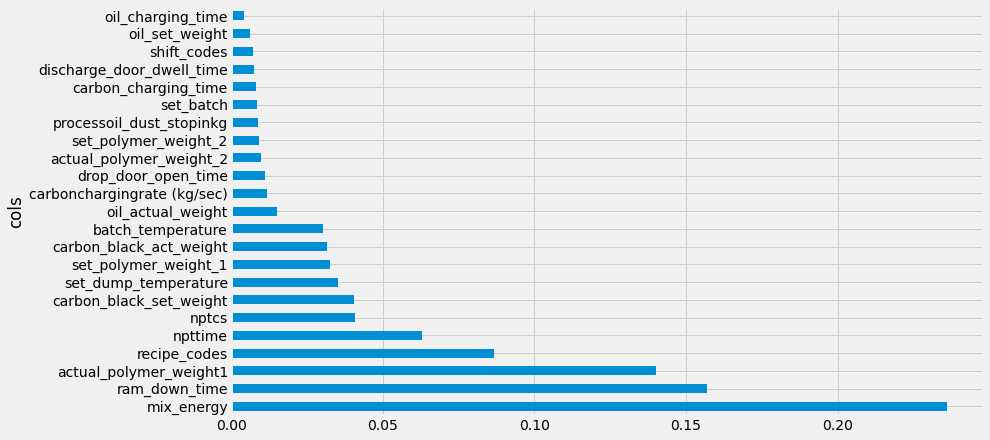

In [82]:
fi = rf_feat_importance(rf, X_train[to_keep_cols])
plot_fi(fi);

In [83]:
fi

cols       imp
0                    mix_energy  0.236228
1                 ram_down_time  0.156955
2        actual_polymer_weight1  0.140019
3                  recipe_codes  0.086689
4                       npttime  0.062738
5                         nptcs  0.040647
7       carbon_black_set_weight  0.040318
8          set_dump_temperature  0.035258
6          set_polymer_weight_1  0.032652
9       carbon_black_act_weight  0.031503
10            batch_temperature  0.030293
13            oil_actual_weight  0.014920
12  carbonchargingrate (kg/sec)  0.011881
11          drop_door_open_time  0.011012
16      actual_polymer_weight_2  0.009902
18         set_polymer_weight_2  0.009048
19     processoil_dust_stopinkg  0.008867
14                    set_batch  0.008381
17         carbon_charging_time  0.008047
21    discharge_door_dwell_time  0.007526
20                  shift_codes  0.007030
15               oil_set_weight  0.006022
22            oil_charging_time  0.004064

In [84]:
import scipy
from scipy.cluster  import hierarchy as hc

In [85]:
corr = np.round(scipy.stats.spearmanr(X_train[to_keep_cols]).correlation, 4)

In [86]:
corr[corr<0]=0
corr[np.isnan(corr)]=0

<Figure size 720x432 with 0 Axes>

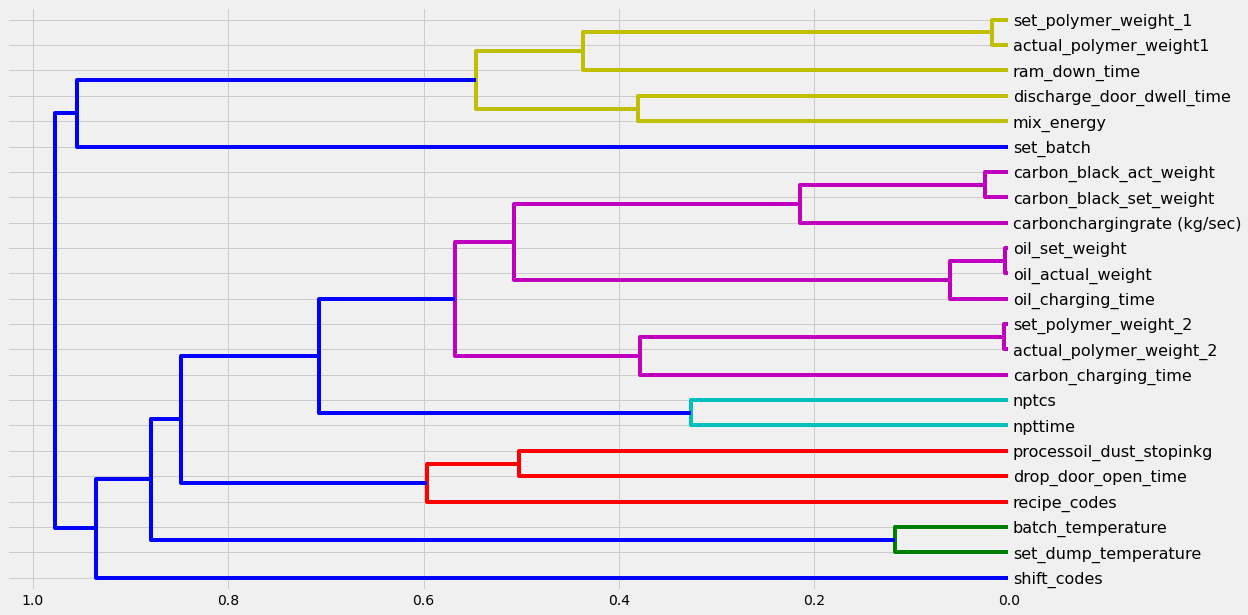

In [87]:
#corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
plt.figure(figsize=(10,6))
corr_condensed = hc.distance.squareform(1-corr,checks=False)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train[to_keep_cols].columns, orientation='left', leaf_font_size=16)
plt.show()

# Drop Highly Correlated Features

In [88]:
#"actual_polymer_weight_3","set_polymer_weight_3",\"set_polymer_weight_4","actual_polymer_weight_4"
corr_cols = ["set_polymer_weight_1","actual_polymer_weight1","set_polymer_weight_2","actual_polymer_weight_2","carbon_black_set_weight","carbon_black_act_weight","oil_actual_weight","oil_set_weight"]

In [89]:
def get_oob(df,y_train):
    m = RandomForestRegressor(n_estimators=35, min_samples_leaf=3, n_jobs=-1, oob_score=True)
    m.fit(df, y_train)
    return m.oob_score_

In [90]:
for c in corr_cols:
    print(c, get_oob(X_train[to_keep_cols].drop(c, axis=1),y_train))

set_polymer_weight_1 0.980252513521231
actual_polymer_weight1 0.9672317654844977
set_polymer_weight_2 0.9796029969165715
actual_polymer_weight_2 0.9797350547540593
carbon_black_set_weight 0.980921251561451
carbon_black_act_weight 0.9795366092870025
oil_actual_weight 0.9799394687911249
oil_set_weight 0.9815519916572737


In [91]:
to_drop = ["set_polymer_weight_1","set_polymer_weight_2","carbon_black_set_weight","oil_set_weight"]
total_feats = num_feats+cat_feats
print(f'Total feats before dropping {len(to_keep_cols)}')
total_feats = [i for i in to_keep_cols if i not in to_drop]
print(f'Total feats after dropping {len(total_feats)}')

Total feats before dropping 23
Total feats after dropping 19


In [92]:
from sklearn.feature_selection import RFECV

In [93]:
def RFECV_(rfcev_obj,X,Y,scorer_name = None,rs = 123):
    np.random.seed(rs)
    rfcev_obj.fit(X,Y)
    plt.figure(figsize=(10,10))
    plt.plot(rfcev_obj.grid_scores_);
    plt.xlabel('Number of Features'); plt.ylabel(f'{scorer_name}'); plt.title('Feature Selection Scores');
    sel_cols = X.columns[rfcev_obj.support_]
    ranking_cols = sorted(list(zip(rfcev_obj.ranking_,X.columns)),key = lambda x: x[0])
    print(sel_cols)
    print(len(sel_cols))
    return sel_cols, ranking_cols

In [94]:
 #Create a model for feature selection
estimator = RandomForestRegressor(random_state = 10,
                                   n_estimators = 100,
                                   n_jobs = -1,
                                   oob_score=True,
                                   max_features=0.8)

# Create the object
selector_mean_squared_error = RFECV(estimator, step = 1, cv = KFold(10), scoring = "neg_mean_squared_error", n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Index(['mix_energy', 'ram_down_time', 'actual_polymer_weight1', 'recipe_codes',
       'npttime', 'nptcs', 'set_dump_temperature', 'carbon_black_act_weight',
       'batch_temperature', 'oil_actual_weight', 'actual_polymer_weight_2',
       'processoil_dust_stopinkg', 'discharge_door_dwell_time'],
      dtype='object')
13


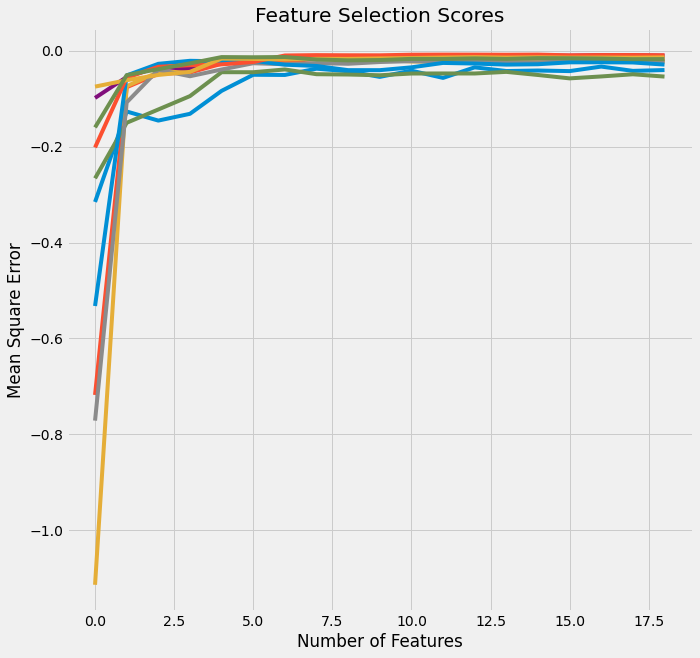

In [95]:
sel_cols,ranking_cols = RFECV_(selector_mean_squared_error,
                X_train[total_feats],
                y_train,
                'Mean Square Error')

In [96]:
ranking_cols

[(1, 'mix_energy'),
 (1, 'ram_down_time'),
 (1, 'actual_polymer_weight1'),
 (1, 'recipe_codes'),
 (1, 'npttime'),
 (1, 'nptcs'),
 (1, 'set_dump_temperature'),
 (1, 'carbon_black_act_weight'),
 (1, 'batch_temperature'),
 (1, 'oil_actual_weight'),
 (1, 'actual_polymer_weight_2'),
 (1, 'processoil_dust_stopinkg'),
 (1, 'discharge_door_dwell_time'),
 (2, 'drop_door_open_time'),
 (3, 'carbonchargingrate (kg/sec)'),
 (4, 'set_batch'),
 (5, 'carbon_charging_time'),
 (6, 'oil_charging_time'),
 (7, 'shift_codes')]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Index(['mix_energy', 'ram_down_time', 'actual_polymer_weight1', 'recipe_codes',
       'nptcs', 'set_dump_temperature', 'carbon_black_act_weight'],
      dtype='object')
7


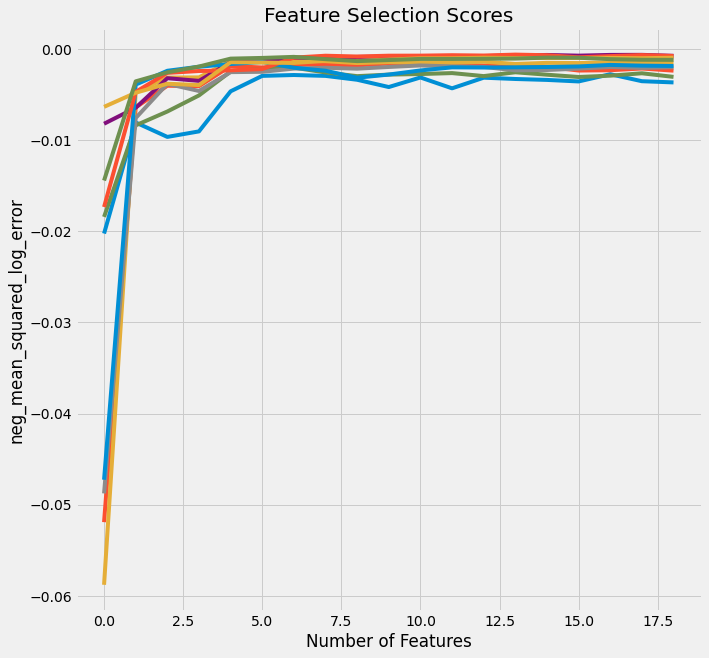

In [97]:
# Create the object
selector_mean_squared_error = RFECV(estimator, step = 1, cv = KFold(10), scoring = "neg_mean_squared_log_error", n_jobs = -1)
sel_cols,ranking_cols = RFECV_(selector_mean_squared_error,
                X_train[total_feats] ,
                y_train,
                'neg_mean_squared_log_error')

In [98]:
from sklearn.inspection import permutation_importance

In [99]:
np.random.seed(123)
rf=RandomForestRegressor(n_estimators=30,oob_score=True,min_samples_leaf=3)
rf_model_keep=rf.fit(X_train[total_feats],y_train)
#%prun
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


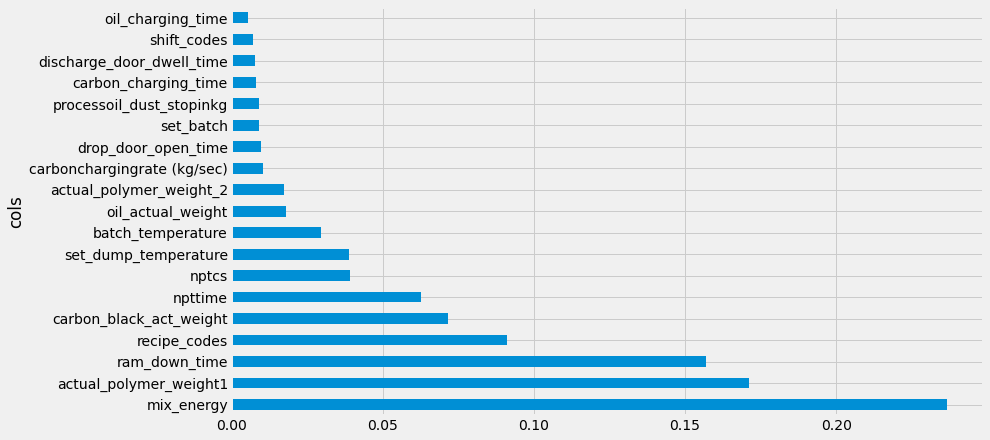

In [100]:
fi = rf_feat_importance(rf, X_train[total_feats])
plot_fi(fi);

In [101]:
tmp = permutation_importance(rf,X_val[total_feats] ,
                                          y_val,
                                          scoring="neg_mean_squared_log_error")

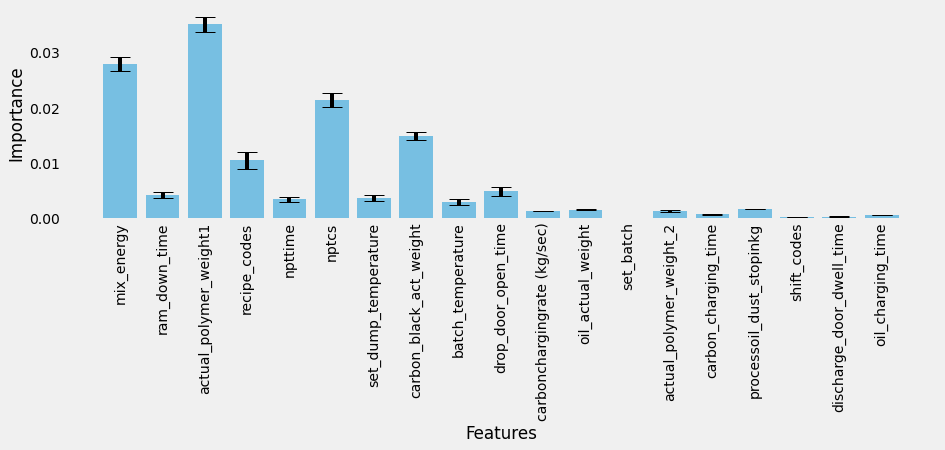

In [102]:
plt.figure(figsize=(15,8))
plt.bar(total_feats,
           tmp["importances_mean"],
          yerr= tmp["importances_std"],
          align = 'center',alpha = 0.5, ecolor= 'black',capsize = 10,orientation = u'vertical')
plt.grid()
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(total_feats,rotation  = 90)
plt.margins(0.05)
plt.tight_layout(pad=5)

In [103]:
print(set(X_train.set_batch.unique()).difference(X_val.set_batch.unique()))

{9, 10, 11, 13, 19, 21, 23, 26, 31, 34, 35, 38, 39, 42, 43, 44, 45, 46, 47, 48, 50, 65, 66, 67}


In [104]:
#Shift Code seems to have less improtance in both train and val data.
print(set(X_train.shift_codes.unique()).difference(X_val.shift_codes.unique()))

set()


In [105]:
X_val.set_batch.unique()

[20, 36, 32, 1, 40, ..., 3, 33, 5, 25, 27]
Length: 27
Categories (52, int64): [1, 2, 3, 4, ..., 65, 66, 67, 70]

## Features to drop

In [106]:
to_drop = ["set_batch","shift_codes","discharge_door_dwell_time","oil_charging_time"]
total_feats = [i for i in total_feats if i not in to_drop]
print(f'Number of features after dropping {len(total_feats)}')

Number of features after dropping 15


# Retrain Again

In [107]:
np.random.seed(123)
rf=RandomForestRegressor(n_estimators=30,oob_score=True,min_samples_leaf=3)
rf_model_keep=rf.fit(X_train[total_feats],y_train)
#%prun
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


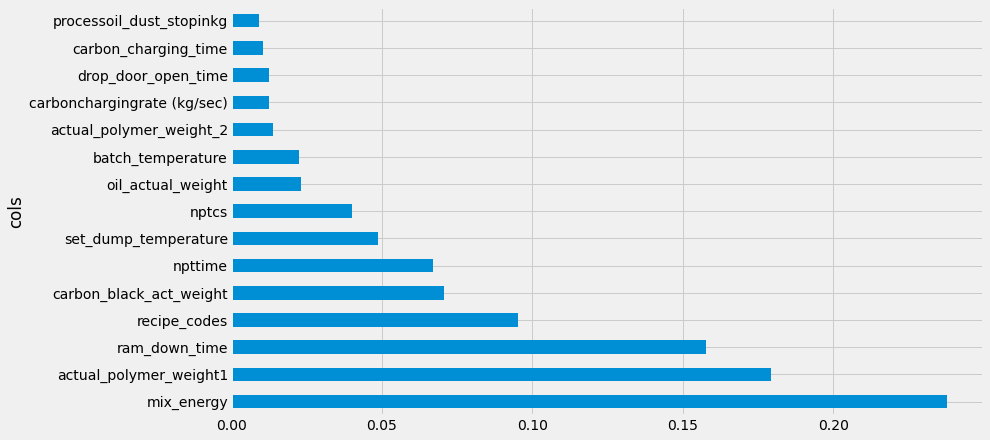

In [108]:
fi = rf_feat_importance(rf, X_train[total_feats])
plot_fi(fi);

# Noisy Features

In [109]:
!pip3 install featexp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from featexp import get_univariate_plots, get_trend_stats

In [111]:
get_trend_stats(data=X_train[total_feats+["mixer_efficiency"]], \
                target_col='mixer_efficiency', data_test=X_val[total_feats+["mixer_efficiency"]])

/usr/local/lib/python3.7/dist-packages/featexp/base.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[feature] = input_data[feature].round(5)


Returning stats for all numeric features


Feature  Trend_changes  Trend_changes_test  \
0                    mix_energy              2                   3   
1                 ram_down_time              2                   3   
2        actual_polymer_weight1              5                   3   
3                  recipe_codes              5                   7   
4                       npttime              3                   4   
5                         nptcs              1                   0   
6          set_dump_temperature              3                   3   
7       carbon_black_act_weight              5                   5   
8             batch_temperature              5                   4   
9           drop_door_open_time              3                   1   
10  carbonchargingrate (kg/sec)              4                   4   
11            oil_actual_weight              6                   5   
12      actual_polymer_weight_2              4                   3   
13         carbon_charging_time              1                   3   
14     processoil_dust_stopinkg              2                   1   

    Trend_correlation  
0            0.831381  
1            0.697850  
2            0.349364  
3            0.863120  
4            0.954288  
5            0.796548  
6            0.838653  
7           -0.112769  
8            0.905494  
9            0.794257  
10           0.203053  
11           0.383175  
12           0.360557  
13           0.057094  
14           0.694006

                                         Plots for mix_energy                                         
                                           Train data plots                                           


/usr/local/lib/python3.7/dist-packages/featexp/base.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[feature] = input_data[feature].round(5)


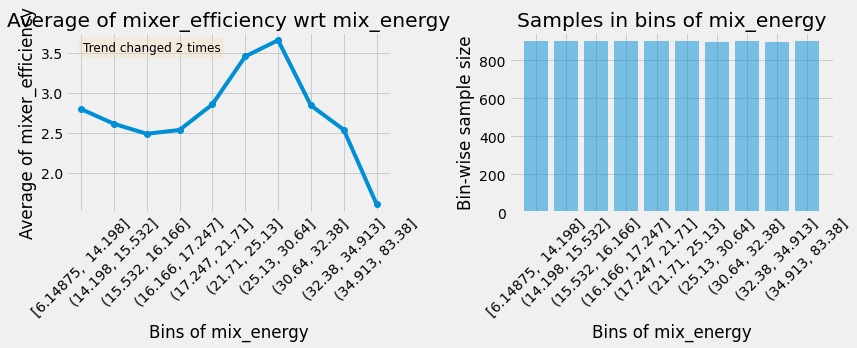

                                           Test data plots                                            


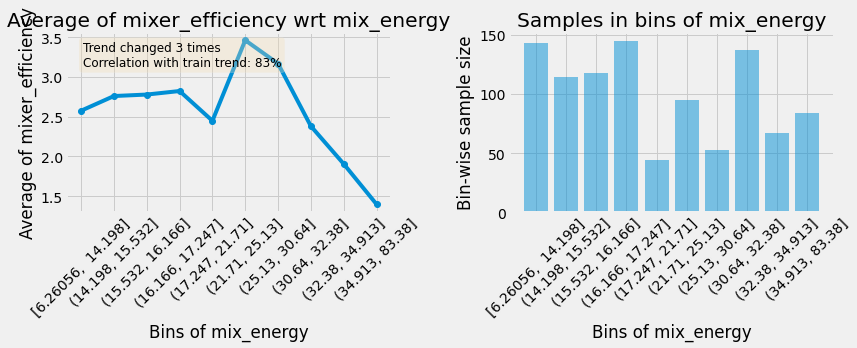

--------------------------------------------------------------------------------------------------------------


                                       Plots for ram_down_time                                        
                                           Train data plots                                           


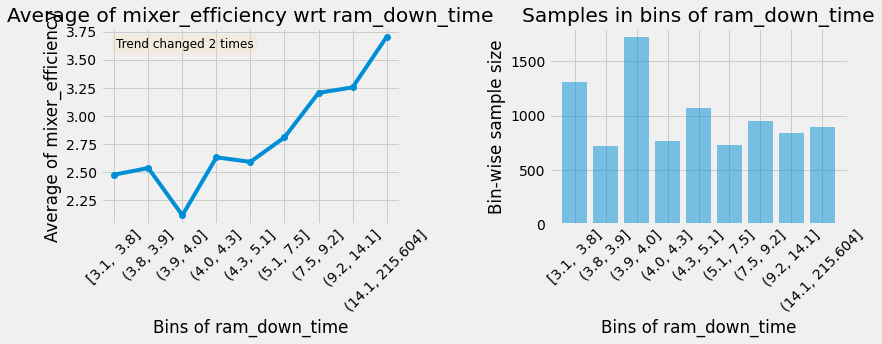

                                           Test data plots                                            


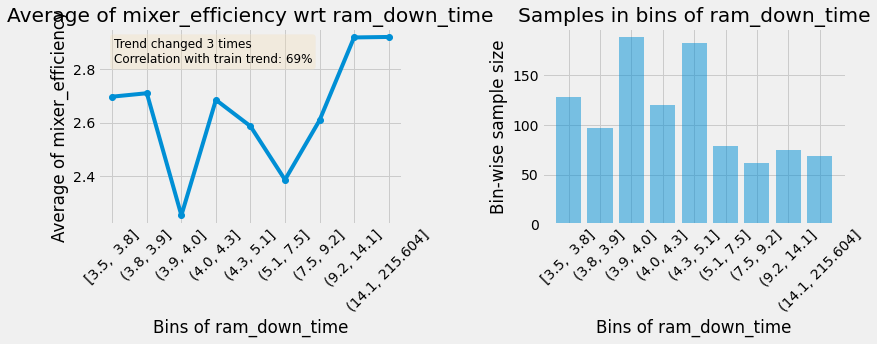

--------------------------------------------------------------------------------------------------------------


                                   Plots for actual_polymer_weight1                                   
                                           Train data plots                                           


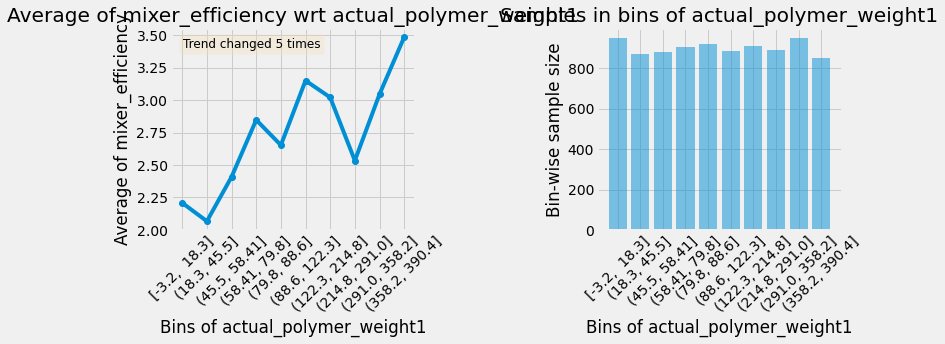

                                           Test data plots                                            


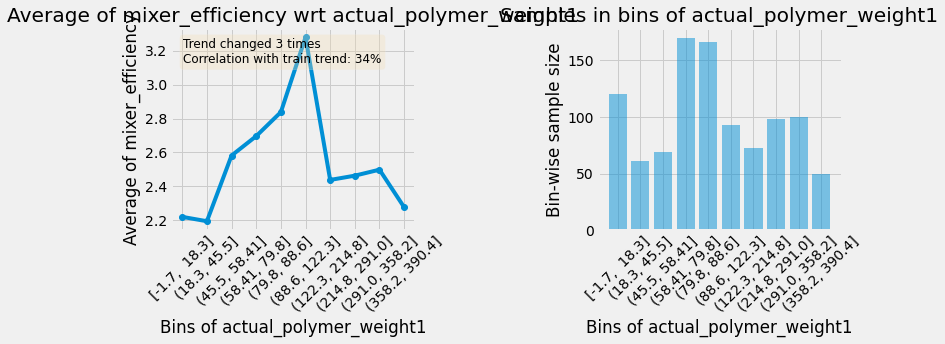

--------------------------------------------------------------------------------------------------------------


                                        Plots for recipe_codes                                        
                                           Train data plots                                           


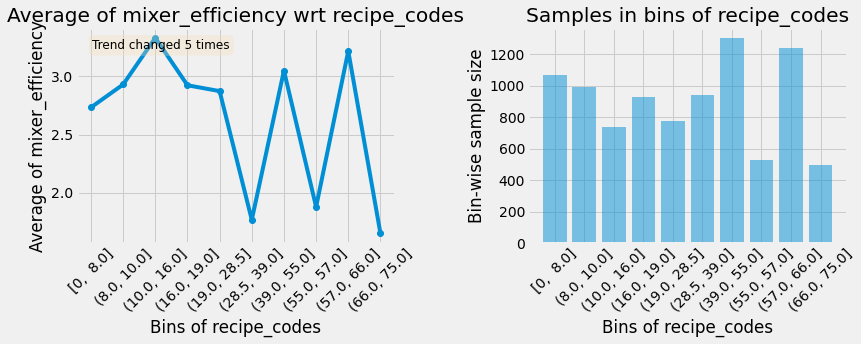

                                           Test data plots                                            


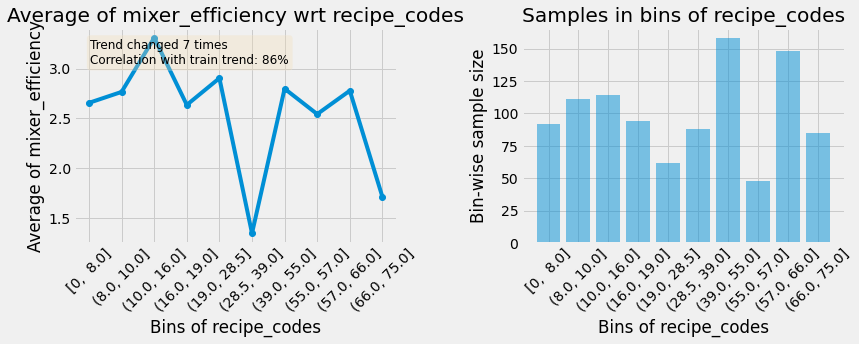

--------------------------------------------------------------------------------------------------------------


                                          Plots for npttime                                           
                                           Train data plots                                           


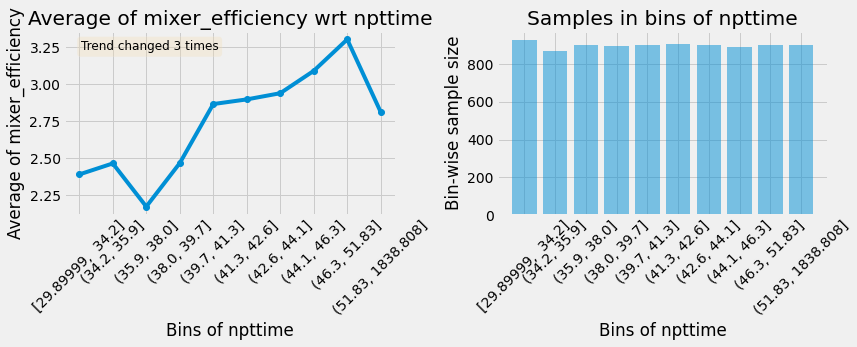

                                           Test data plots                                            


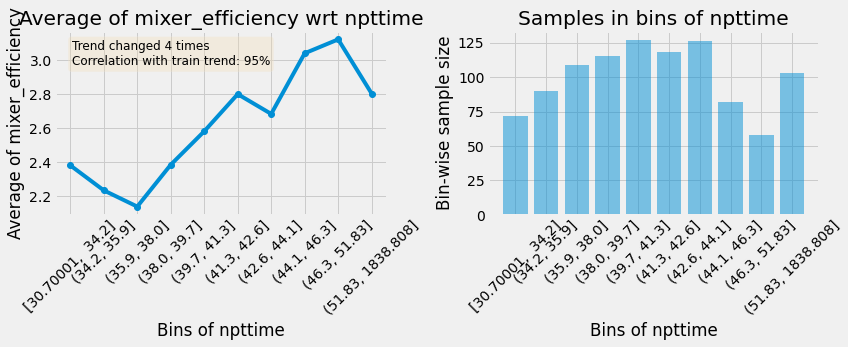

--------------------------------------------------------------------------------------------------------------


                                           Plots for nptcs                                            
                                           Train data plots                                           


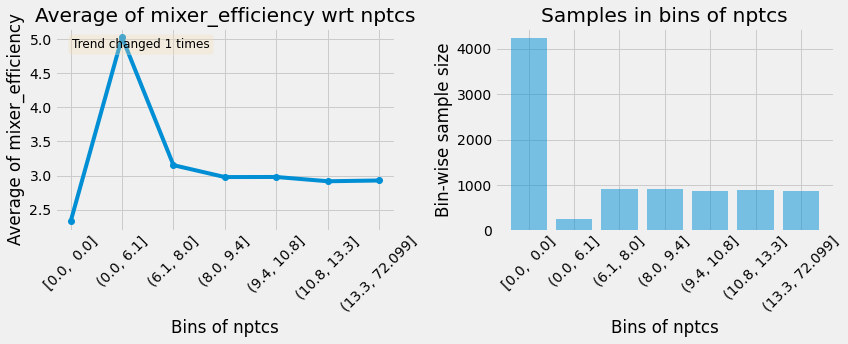

                                           Test data plots                                            


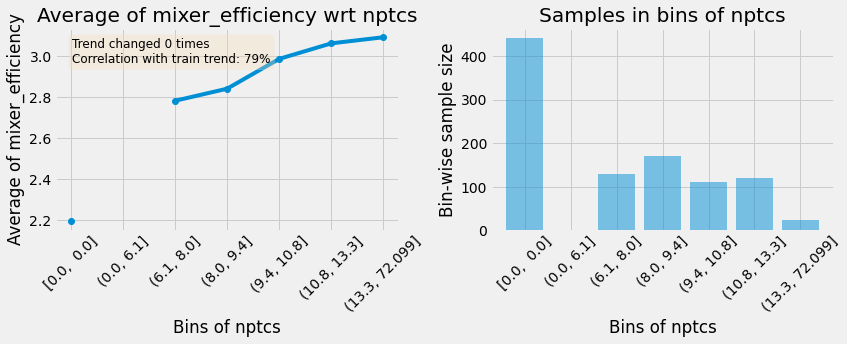

--------------------------------------------------------------------------------------------------------------


                                    Plots for set_dump_temperature                                    
                                           Train data plots                                           


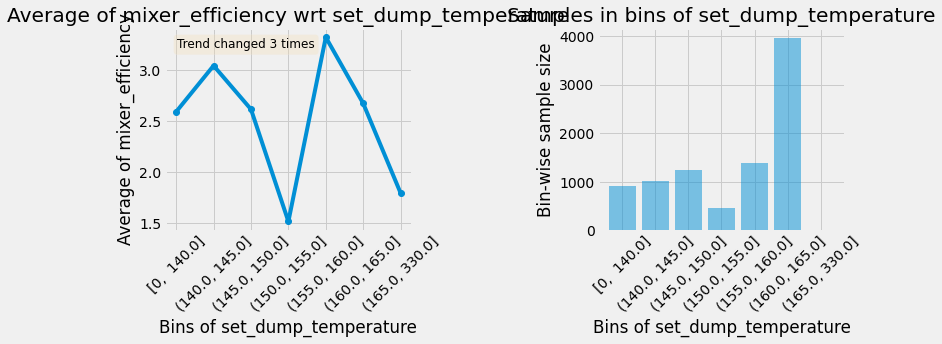

                                           Test data plots                                            


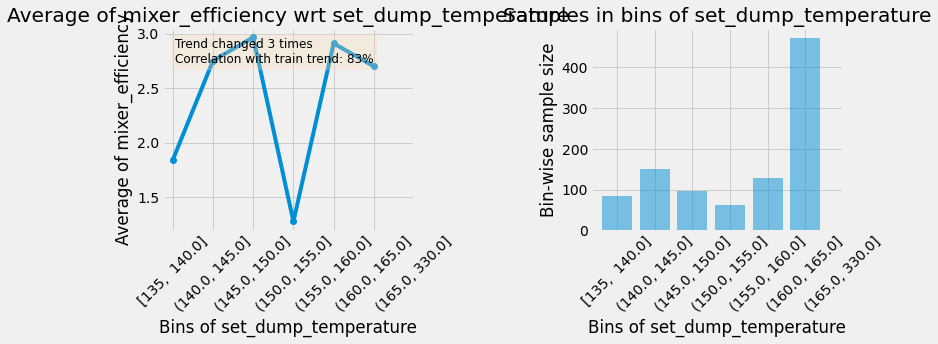

--------------------------------------------------------------------------------------------------------------


                                  Plots for carbon_black_act_weight                                   
                                           Train data plots                                           


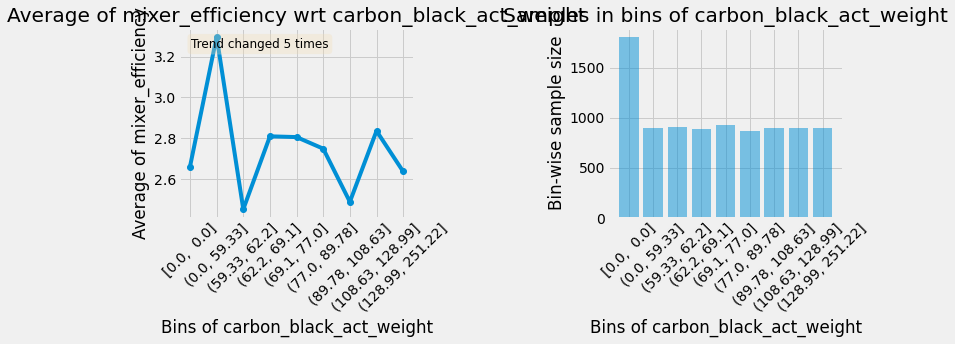

                                           Test data plots                                            


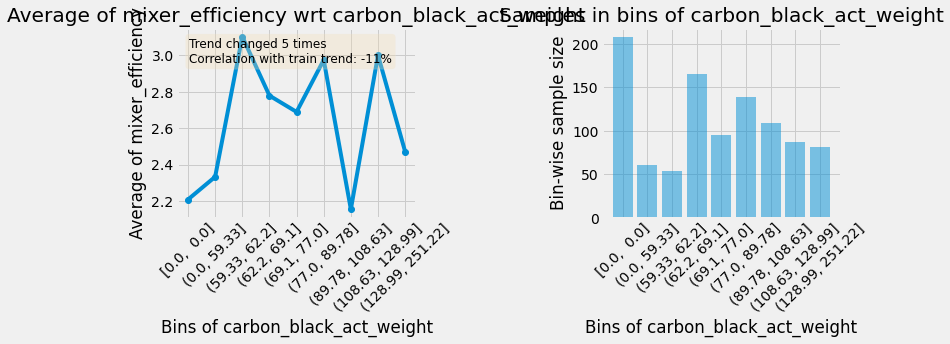

--------------------------------------------------------------------------------------------------------------


                                     Plots for batch_temperature                                      
                                           Train data plots                                           


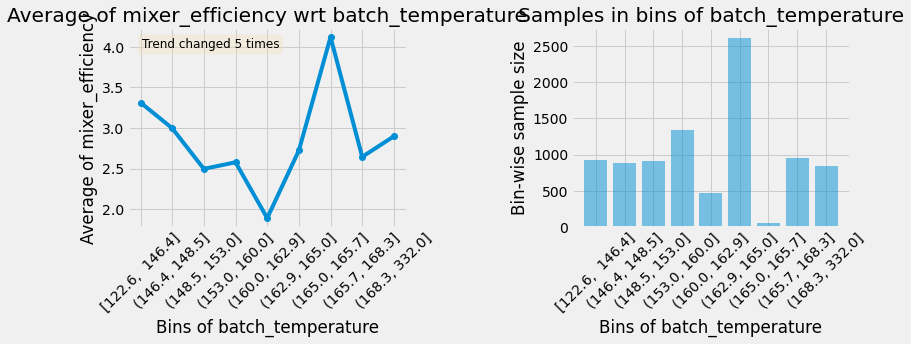

                                           Test data plots                                            


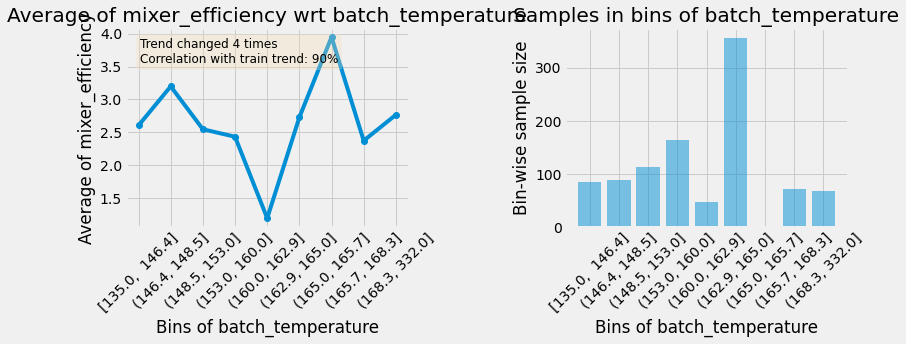

--------------------------------------------------------------------------------------------------------------


                                    Plots for drop_door_open_time                                     
                                           Train data plots                                           


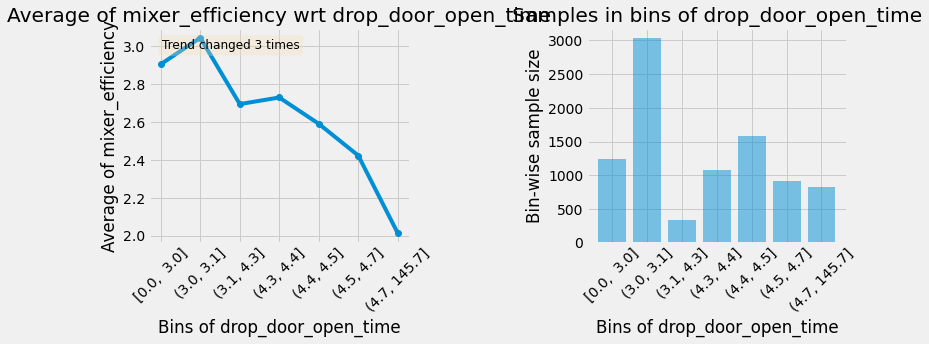

                                           Test data plots                                            


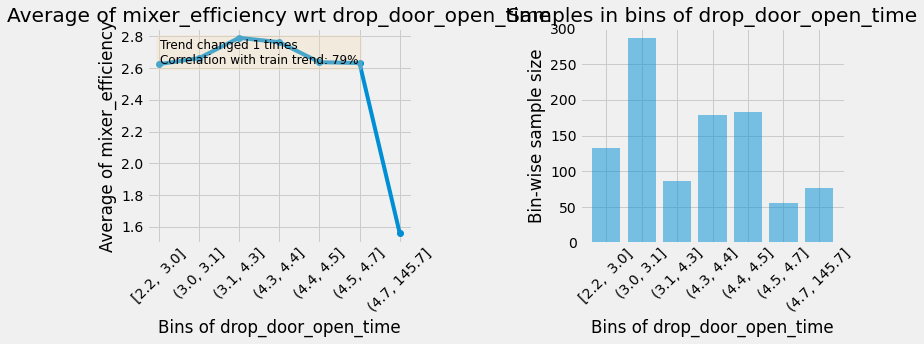

--------------------------------------------------------------------------------------------------------------


                                Plots for carbonchargingrate (kg/sec)                                 
                                           Train data plots                                           


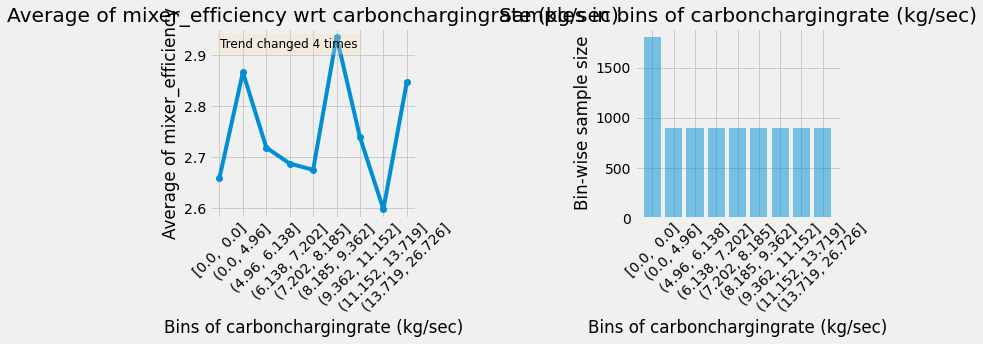

                                           Test data plots                                            


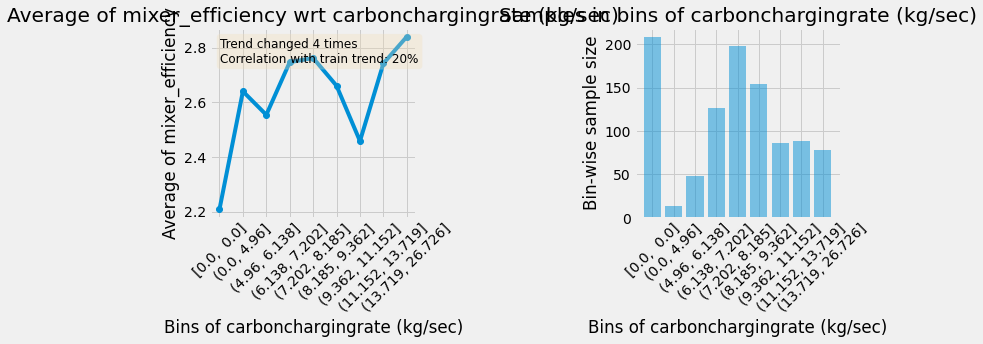

--------------------------------------------------------------------------------------------------------------


                                     Plots for oil_actual_weight                                      
                                           Train data plots                                           


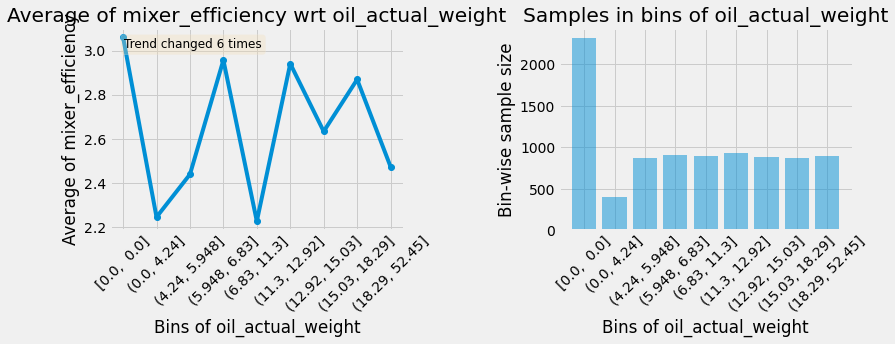

                                           Test data plots                                            


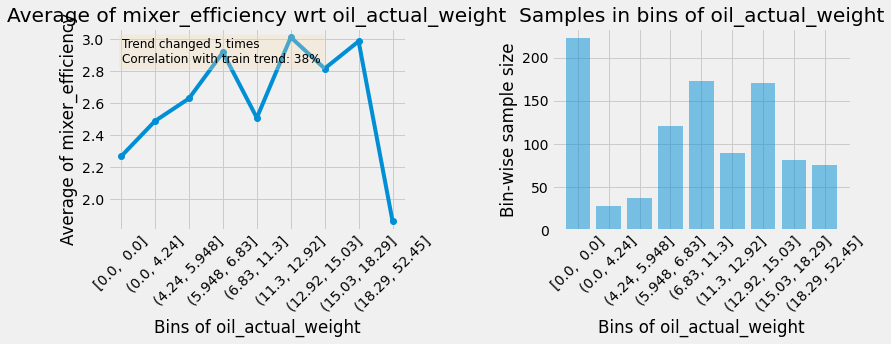

--------------------------------------------------------------------------------------------------------------


                                  Plots for actual_polymer_weight_2                                   
                                           Train data plots                                           


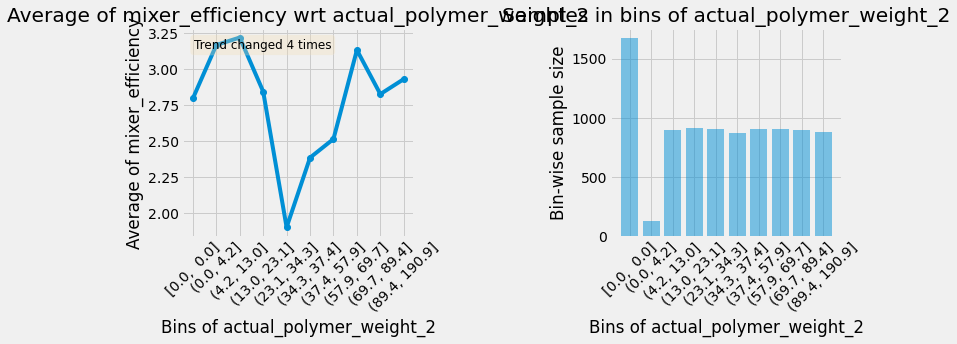

                                           Test data plots                                            


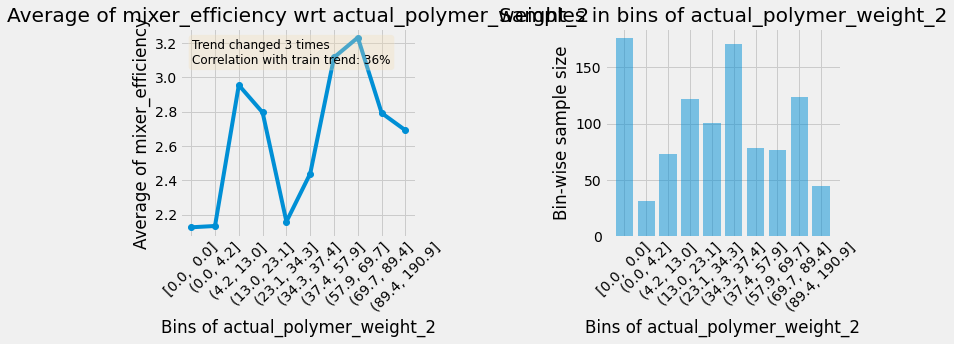

--------------------------------------------------------------------------------------------------------------


                                    Plots for carbon_charging_time                                    
                                           Train data plots                                           


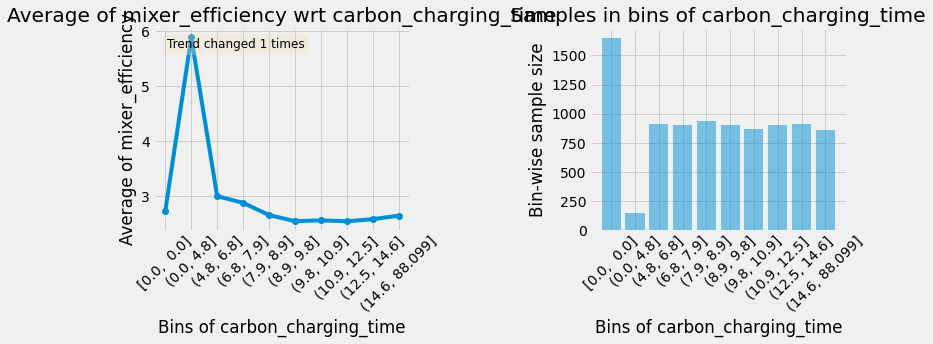

                                           Test data plots                                            


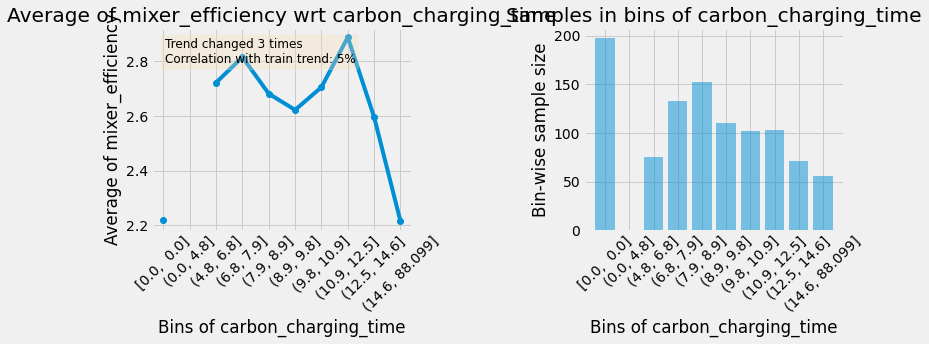

--------------------------------------------------------------------------------------------------------------


                                  Plots for processoil_dust_stopinkg                                  
                                           Train data plots                                           


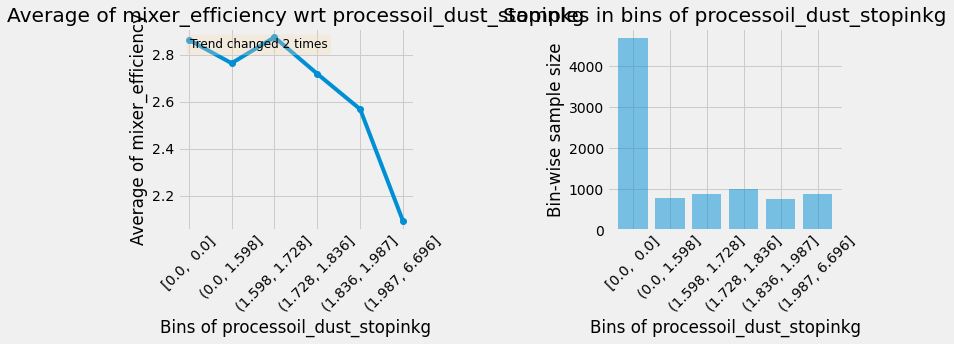

                                           Test data plots                                            


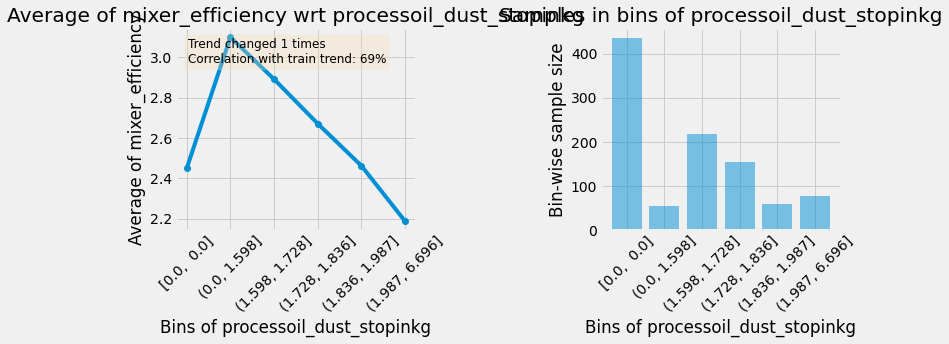

--------------------------------------------------------------------------------------------------------------




In [112]:
get_univariate_plots(data=X_train[total_feats+["mixer_efficiency"]], \
                target_col='mixer_efficiency', data_test=X_val[total_feats+["mixer_efficiency"]],features_list = total_feats+["mixer_efficiency"])

# Algorithm Selection and Hyperparameter Tuning

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [114]:
pipe_dim1 = Pipeline(steps = [
                      ('classifier',RandomForestRegressor(random_state=1))])
pipe_dim2 = Pipeline(steps = [
                      ('classifier',ExtraTreesRegressor(random_state=1))])

param_grid_dim1 = [{
    'classifier': [RandomForestRegressor(random_state=1), ExtraTreesRegressor(random_state=1)],
    'classifier__n_estimators' : [int(x) for x in np.linspace(start = 40, stop = 60, num = 10)],
    'classifier__max_features' : ['auto', 'sqrt','log2','0.7','0.8','0.9'],
    'classifier__max_depth': list(range(1, 3)) + [None],
    'classifier__min_samples_split' : [int(x) for x in np.linspace(2, 5, num = 1)],
    'classifier__min_samples_leaf' : [int(x) for x in np.linspace(1, 5, num = 1)],
    'classifier__criterion':['squared_error','absolute_error']}]

In [115]:
gridcvs = {}
inner_cv = KFold(n_splits=10, shuffle=True, random_state=1)

for pgrid, est, name in zip((param_grid_dim1,param_grid_dim1),
                            (pipe_dim1,pipe_dim2),
                            ['RF','Etree']):
    print(name)
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_mean_squared_log_error',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

RF
Etree


In [116]:
import logging
logging.basicConfig(level=20)
logger = logging.getLogger()

In [117]:
import datetime
def return_timestamp():
    return datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [118]:
def return_logs_filename(filename,file_extension):
        fname = filename +'_' + return_timestamp() + '.' + file_extension
        logger.info(f'Filename : {fname}')
        return fname

In [119]:
logs_fname = return_logs_filename("loc_cvlogs",'txt')

INFO:root:Filename : loc_cvlogs_20220707-151501.txt


In [120]:
x_train_all_feat_array = X_train[total_feats].reset_index(drop=True)

In [121]:
y_train = y_train.reset_index(drop=True)

In [122]:
# log_f = open(RESULTS_DIR/logs_fname,"w")

# for name, gs_est in sorted(gridcvs.items()):

#     print(50 * '-', '\n')
#     print('Algorithm:', name)
#     print('    Inner loop:')
    
#     log_f.write(f'{50 * "-"}\n')
#     log_f.write(f'Algorithm: {name}')
#     log_f.write(f'    Inner loop:')
    
#     outer_scores = []
#     outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
    
    
#     for train_idx, valid_idx in outer_cv.split(x_train_all_feat_array, y_train):
        
#         gridcvs[name].fit(x_train_all_feat_array.iloc[train_idx,:], y_train[train_idx]) # run inner loop hyperparam tuning
#         print('\n        Best ACC (avg. of inner test folds) %.2f%%' % (gridcvs[name].best_score_ * 100))
#         print('        Best parameters:', gridcvs[name].best_params_)
        
#         log_f.write(
#             f'\n        Best ACC (avg. of inner test folds): {gridcvs[name].best_score_ * 100:.2f}')
        
#         log_f.write(f'        Best parameters: {gridcvs[name].best_params_}')
        
#         # perf on test fold (valid_idx)
#         pred = gridcvs[name].best_estimator_.predict(x_train_all_feat_array.iloc[valid_idx,:])
#         outer_scores.append(mean_squared_log_error(Y[valid_idx],pred))
#         print('        ACC (on outer test fold) %.2f%%' % (outer_scores[-1]*100))
        
#         log_f.write(f'        ACC (on outer test fold): {(outer_scores[-1]*100):.2f}')
    
#     print('\n    Outer Loop:')
#     print('        ACC %.2f%% +/- %.2f' % 
#               (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))
    
#     log_f.write(f'\n    Outer Loop:')
#     log_f.write(f'        ACC {np.mean(outer_scores) * 100:.2f} +/- {np.std(outer_scores) * 100:.2f}')
                    
# log_f.close()                   

# Model Evaluation

In [123]:
model = RandomForestRegressor(n_estimators=30,oob_score=False,min_samples_leaf=3)

In [124]:
n_valid = 1000
n_trn = len(data)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_test = split_vals(data, n_trn)
y_train, y_test = split_vals(data['mixer_efficiency'], n_trn)

print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(9998, 53) (9998,)
(1000, 53) (1000,)


In [125]:
n_valid = 1000
n_trn = len(X_train)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_val = split_vals(X_train, n_trn)
y_train, y_val = split_vals(y_train, n_trn)

print(X_train.shape, y_train.shape)
print(X_val.shape,  y_val.shape)

(8998, 53) (8998,)
(1000, 53) (1000,)


In [126]:
X_train.shape,X_val.shape,X_test.shape

((8998, 53), (1000, 53), (1000, 53))

In [127]:
to_drop = ["carbon_charging_time","carbonchargingrate (kg/sec)"]
total_feats = [i for i in total_feats if i not in to_drop]
len(total_feats)

13

In [128]:
print(total_feats)

['mix_energy', 'ram_down_time', 'actual_polymer_weight1', 'recipe_codes', 'npttime', 'nptcs', 'set_dump_temperature', 'carbon_black_act_weight', 'batch_temperature', 'drop_door_open_time', 'oil_actual_weight', 'actual_polymer_weight_2', 'processoil_dust_stopinkg']


In [129]:
model = model.fit(X_train[total_feats], y_train)

## Validation Score

In [130]:
pred = model.predict(X_val[total_feats])
print(f'Validation Set R2: {r2_score(y_val,pred)}')

Validation Set R2: 0.9781294260611245


## Test Score

In [131]:
pred = model.predict(X_test[total_feats])
print(f'Test Set R2: {r2_score(y_test,pred)}')

Test Set R2: 0.9775608764135174


# Model Stability

## Performance Band for Bigger Dataset

In [132]:
model = RandomForestRegressor(n_estimators=30,oob_score=False,min_samples_leaf=3)
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
  n_valid = 3000
  n_trn = len(data)-n_valid
  X_train, X_test = split_vals(data, n_trn)
  y_train, y_test = split_vals(data['mixer_efficiency'], n_trn)
  #print(f'Train Size: {X_train.shape[0]},Test Size:{ X_test.shape[0]})')
  y_pred_i = model.fit(X_train[total_feats], y_train).predict(X_test[total_feats])
  y_pred_i_acc = r2_score(y_test,y_pred_i)
  pred_2.append(y_pred_i_acc)


Average R2: 97.25%
Performance Band: 96.21% to 97.86%


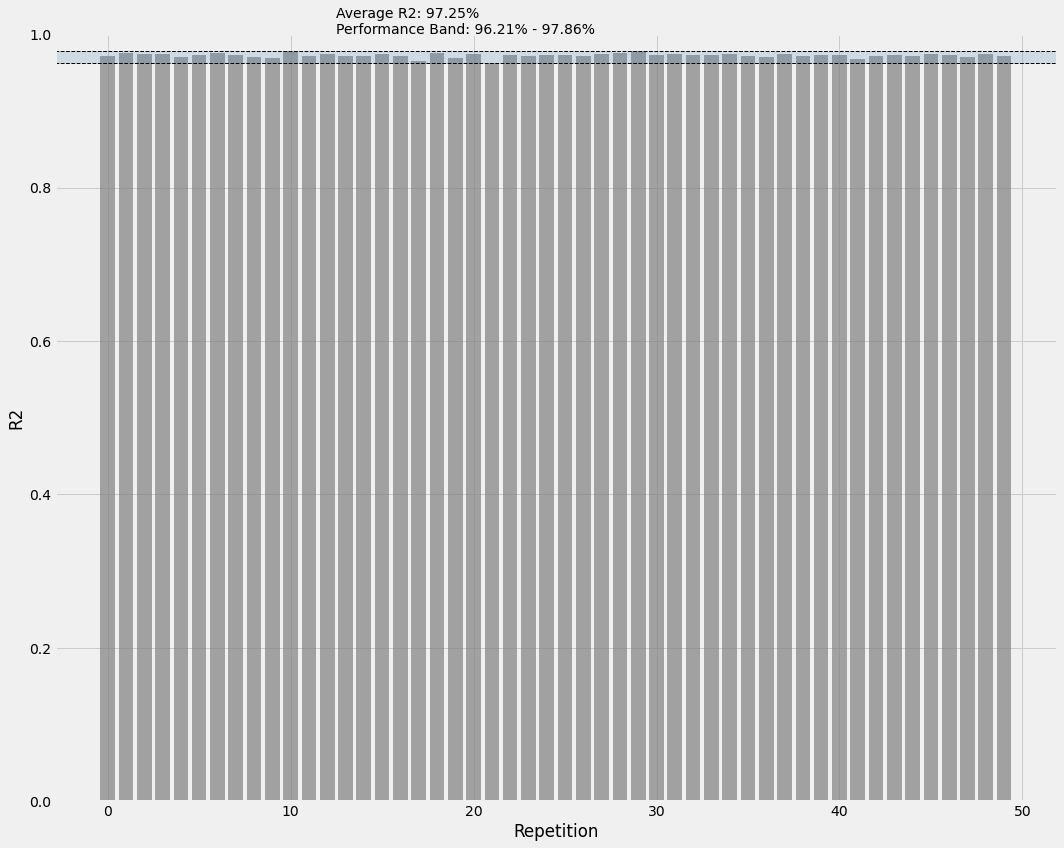

In [133]:
pred_2 = np.asarray(pred_2)
print('Average R2: %.2f%%' % (pred_2.mean()*100))
print('Performance Band: %.2f%% to %.2f%%'  % (pred_2.min()*100,pred_2.max()*100))
with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize = (15,12))
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('R2')
    plt.ylim([0, 1])
    plt.text(pred_2.shape[0]/4,1,f'Average R2: {pred_2.mean()*100:.2f}% \nPerformance Band: {pred_2.min()*100:.2f}% - {pred_2.max()*100:.2f}%')
    plt.tight_layout()
    plt.savefig(RESULTS_DIR/'model-eval-70_30_split.svg')
    plt.show()

## Performance Band for Smaller Dataset

In [134]:
model = RandomForestRegressor(n_estimators=30,oob_score=False,min_samples_leaf=3)
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
  n_valid = 5500
  n_trn = len(data)-n_valid
  raw_train, raw_valid = split_vals(data, n_trn)
  X_train, X_test = split_vals(data, n_trn)
  y_train, y_test = split_vals(data['mixer_efficiency'], n_trn)
  y_pred_i = model.fit(X_train[total_feats], y_train).predict(X_test[total_feats])
  y_pred_i_acc = r2_score(y_test,y_pred_i)
  pred_2.append(y_pred_i_acc)


Average R2: 92.54%
Performance Band: 91.28% to 93.52%


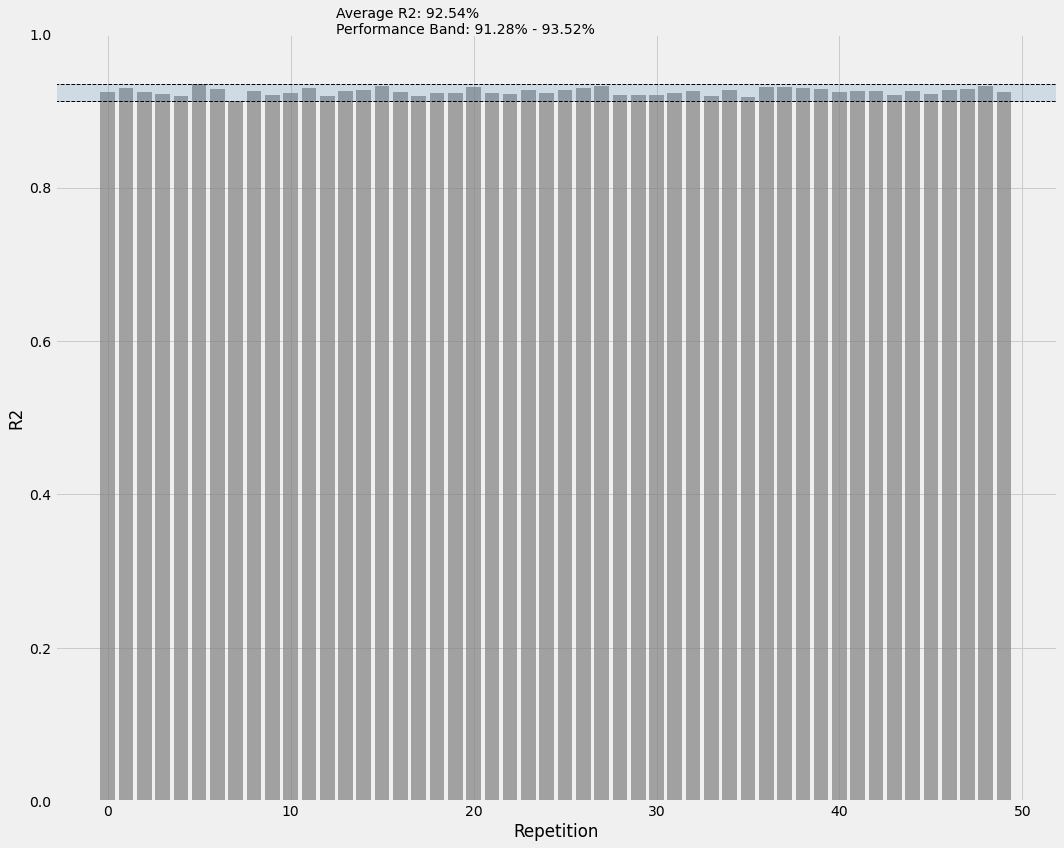

In [135]:
pred_2 = np.asarray(pred_2)
print('Average R2: %.2f%%' % (pred_2.mean()*100))
print('Performance Band: %.2f%% to %.2f%%'  % (pred_2.min()*100,pred_2.max()*100))
with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize = (15,12))
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('R2')
    plt.ylim([0, 1])
    plt.text(pred_2.shape[0]/4,1,f'Average R2: {pred_2.mean()*100:.2f}% \nPerformance Band: {pred_2.min()*100:.2f}% - {pred_2.max()*100:.2f}%')
    plt.tight_layout()
    plt.savefig(RESULTS_DIR/'model-eval-50_50_split.svg')
    plt.show()

# Model Capacity

In [136]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1000
n_trn = len(data)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_test = split_vals(data, n_trn)
y_train, y_test = split_vals(data['mixer_efficiency'], n_trn)

print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(9998, 53) (9998,)
(1000, 53) (1000,)


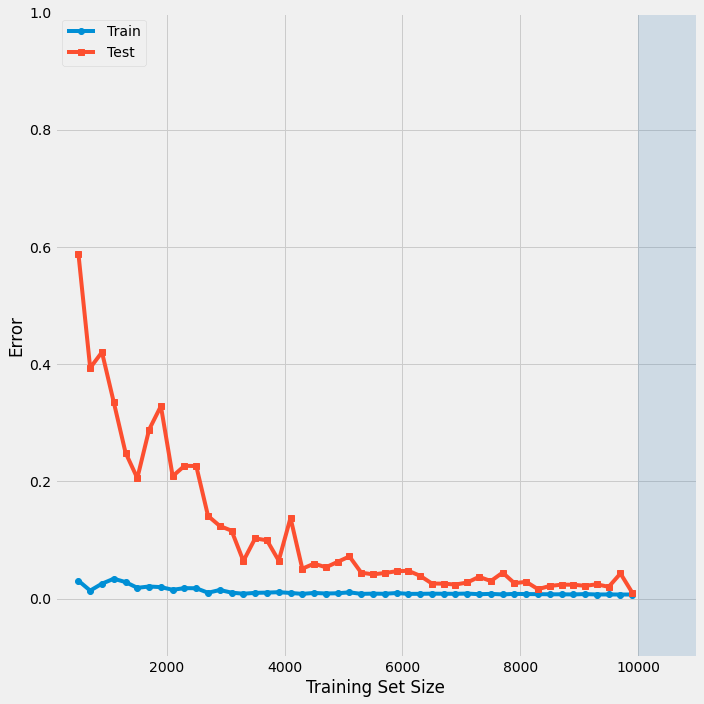

In [137]:
pred_train, pred_test = [], []

intervals = np.arange(500, X_train[total_feats].shape[0] + 1, 200)

for i in intervals:
    model.fit(X_train[total_feats][:i], y_train[:i])
    train_pred = model.predict(X_train[total_feats][:i])
    p_train = r2_score( y_train[:i],train_pred)
    test_pred = model.predict(X_test[total_feats])
    p_test = r2_score(y_test,test_pred)
    pred_train.append(1-p_train)
    pred_test.append(1-p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize= (10,10))
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([100, X_train[total_feats].shape[0] + X_test[total_feats].shape[0]])
    plt.axvspan(X_train[total_feats].shape[0], 
                X_train[total_feats].shape[0] + X_test[total_feats].shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([-0.1, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.tight_layout()
    plt.savefig(RESULTS_DIR/'model-eval-learning_curve.svg')

## MixingCycleTime

In [138]:
# Capping values at 95 percentile
data["mixingcycletime"] = np.where(data["mixingcycletime"]>414.128,414.128,data["mixingcycletime"])

In [139]:
data["mixingcycletime"].quantile(np.arange(0,1.05,0.05))

0.00     72.599951
0.05    116.999373
0.10    119.999356
0.15    121.999356
0.20    123.999294
0.25    125.999287
0.30    128.999255
0.35    132.899209
0.40    138.579356
0.45    148.998996
0.50    152.998888
0.55    156.098740
0.60    161.219176
0.65    166.398991
0.70    172.399218
0.75    187.200091
0.80    193.000030
0.85    199.200730
0.90    278.935658
0.95    414.115701
1.00    414.128000
Name: mixingcycletime, dtype: float64

In [140]:
df_corr = data[num_feats+["mixingcycletime"]].corr()
df_corr.reset_index()[["index","mixingcycletime"]].sort_values(by = "mixingcycletime",ascending=False)

index  mixingcycletime
34              mixingcycletime         1.000000
14                   mix_energy         0.655139
13              set_dump_energy         0.402665
29            oil_actual_weight         0.372476
28               oil_set_weight         0.372314
22      actual_polymer_weight_4         0.292166
21         set_polymer_weight_4         0.292158
26      carbon_black_set_weight         0.224239
7     discharge_door_dwell_time         0.212950
27      carbon_black_act_weight         0.207478
18      actual_polymer_weight_3         0.194918
19         set_polymer_weight_3         0.194304
4                  loading_time         0.193295
3                         nptpl         0.183423
0                       npttime         0.173553
8          drop_door_close_time         0.160461
30            oil_charging_time         0.156648
23  carbonchargingrate (kg/sec)         0.124450
6           drop_door_open_time         0.097411
10                  ram_up_time         0.086911
12            batch_temperature         0.052091
2                     idle_time         0.032342
24         carbon_charging_time         0.031950
15         set_polymer_weight_1         0.017663
1                     setuptime         0.014661
16       actual_polymer_weight1         0.005178
25         carbon_weighing_time        -0.012181
20      actual_polymer_weight_2        -0.075941
17         set_polymer_weight_2        -0.076665
9                 ram_down_time        -0.087416
31            oil_weighing_time        -0.113819
33       lubeoil_dust_stop inkg        -0.217291
11         set_dump_temperature        -0.327819
5                         nptcs        -0.355898
32     processoil_dust_stopinkg        -0.362314

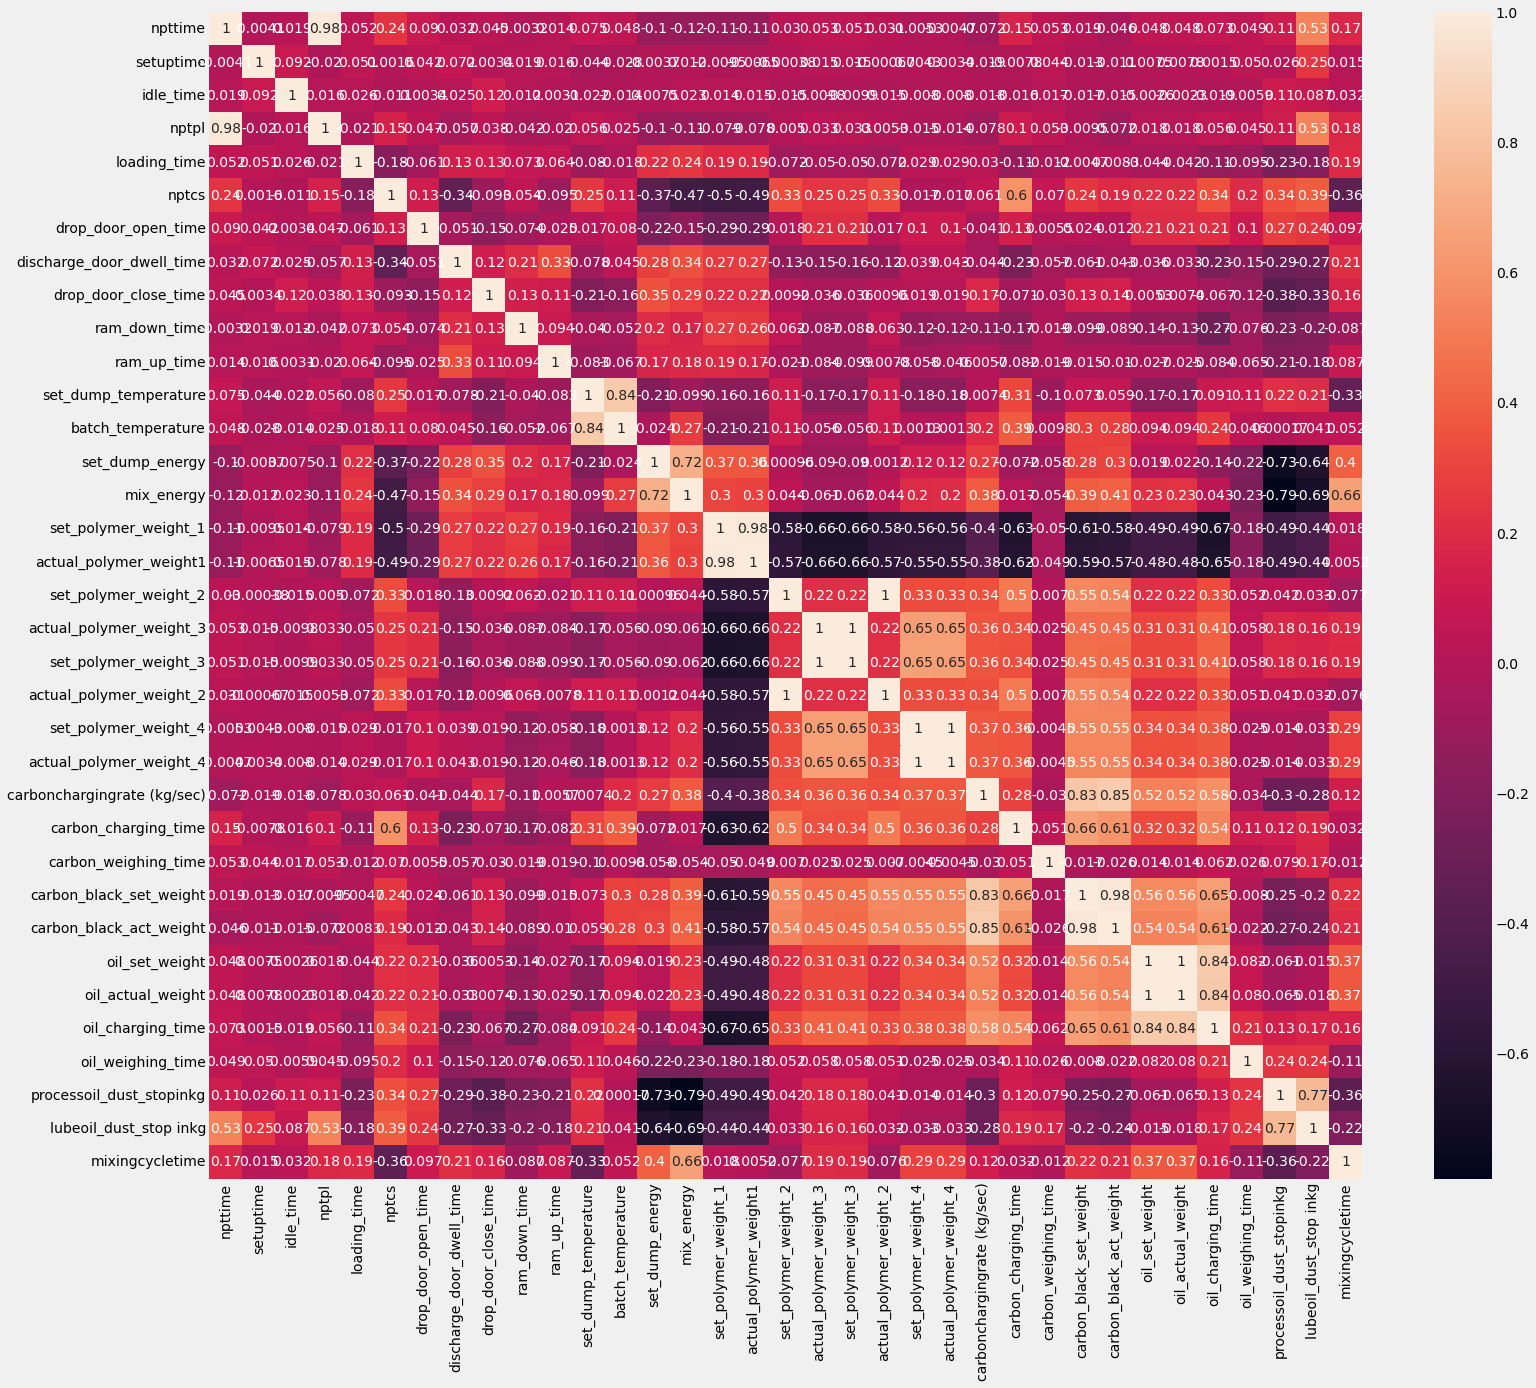

In [141]:

plt.figure(figsize = (23,20))
sns.heatmap(data[num_feats+["mixingcycletime"]].corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


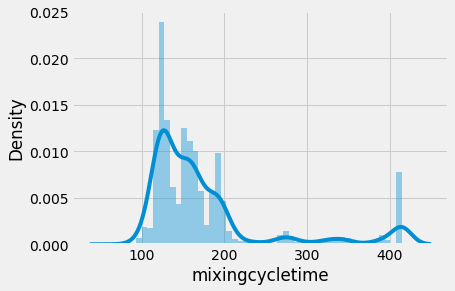

In [142]:
sns.distplot(data["mixingcycletime"])

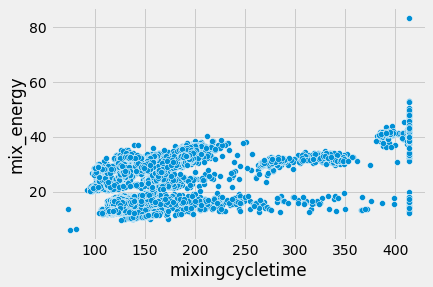

In [143]:
sns.scatterplot(data = data,x = "mixingcycletime",y = "mix_energy")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

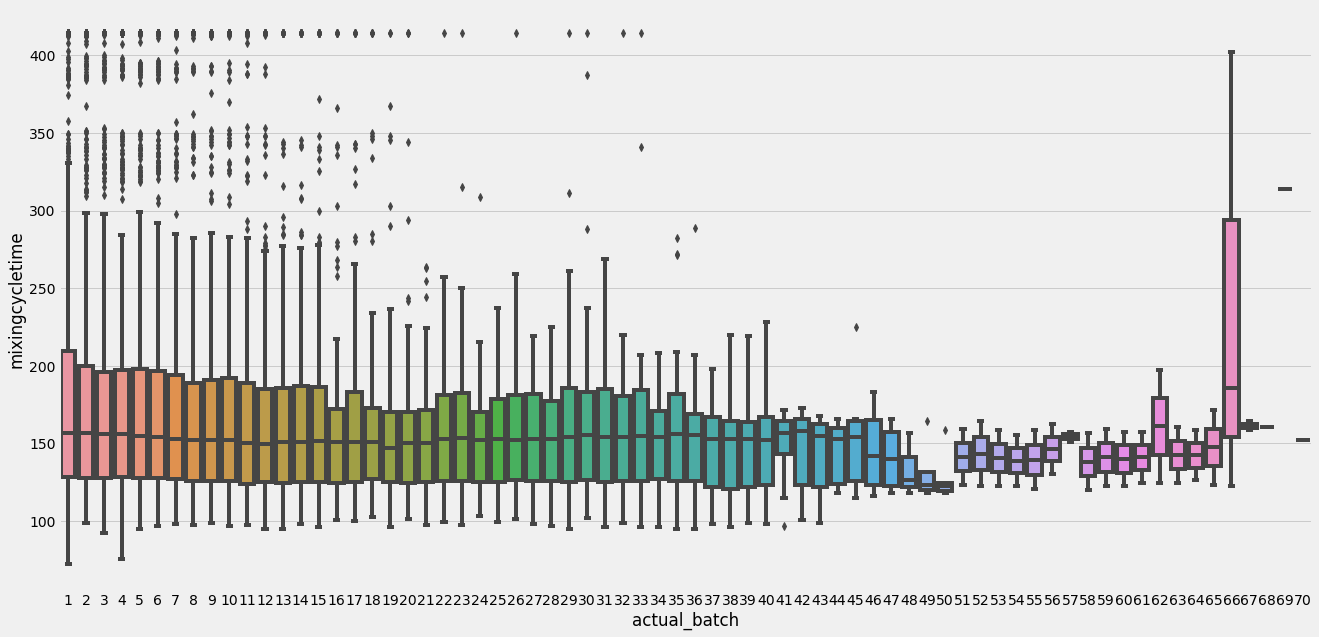

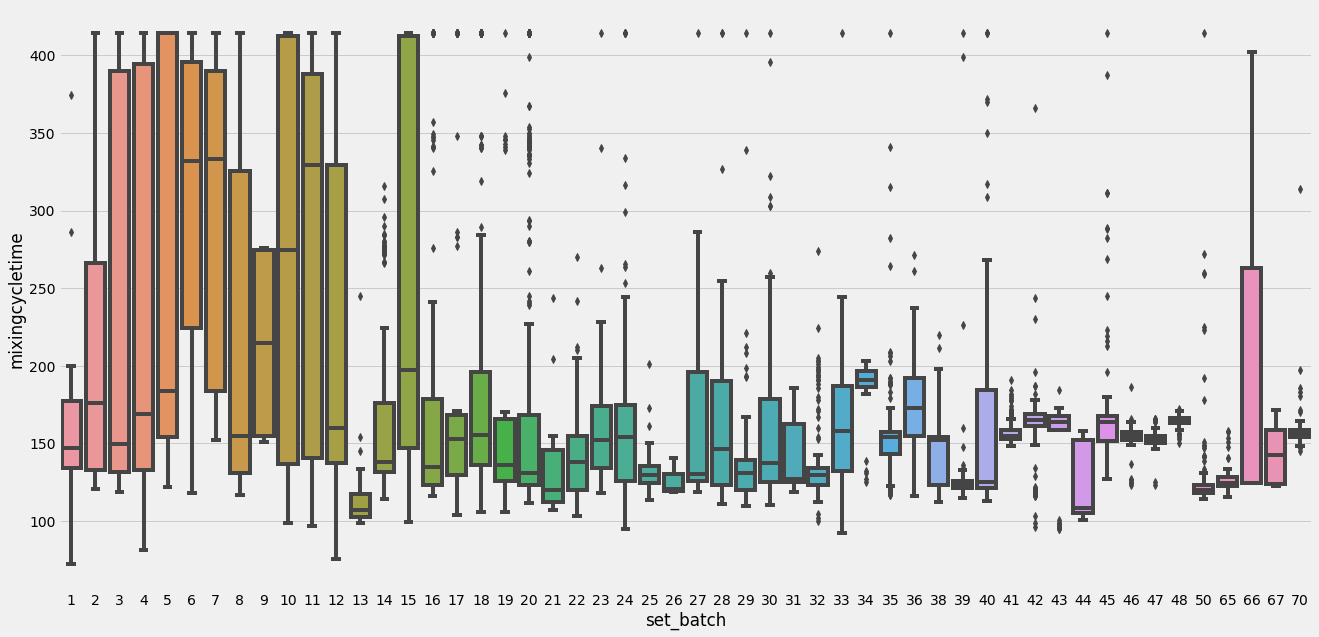

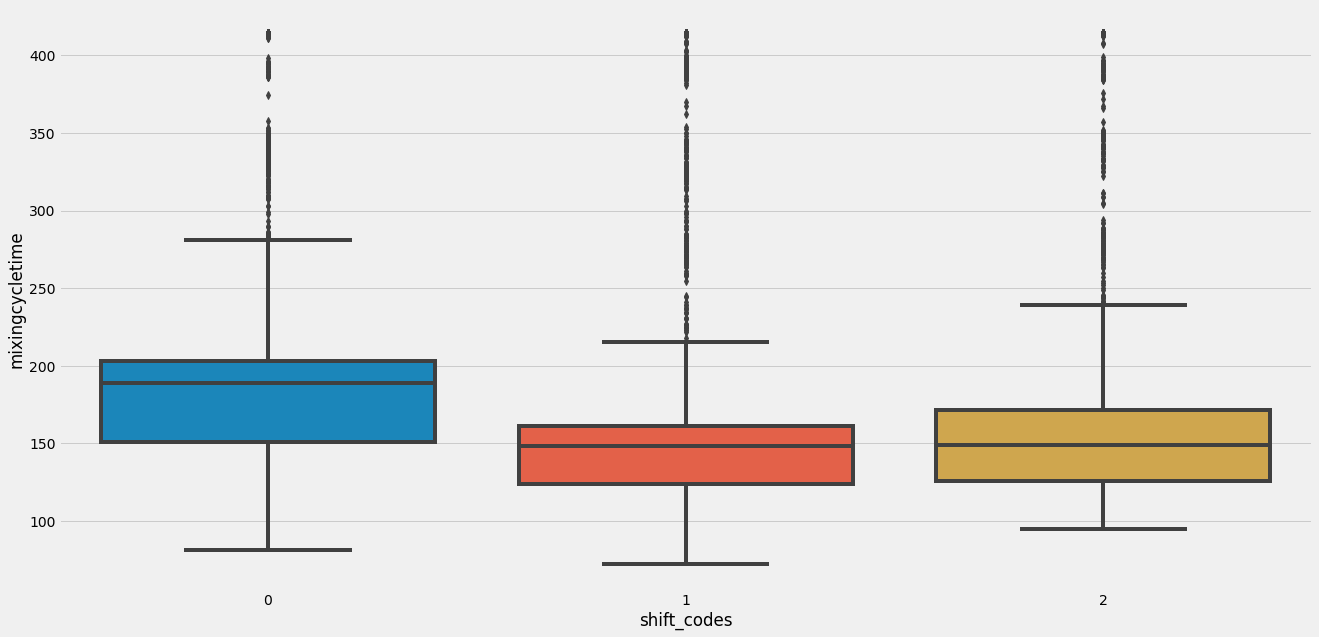

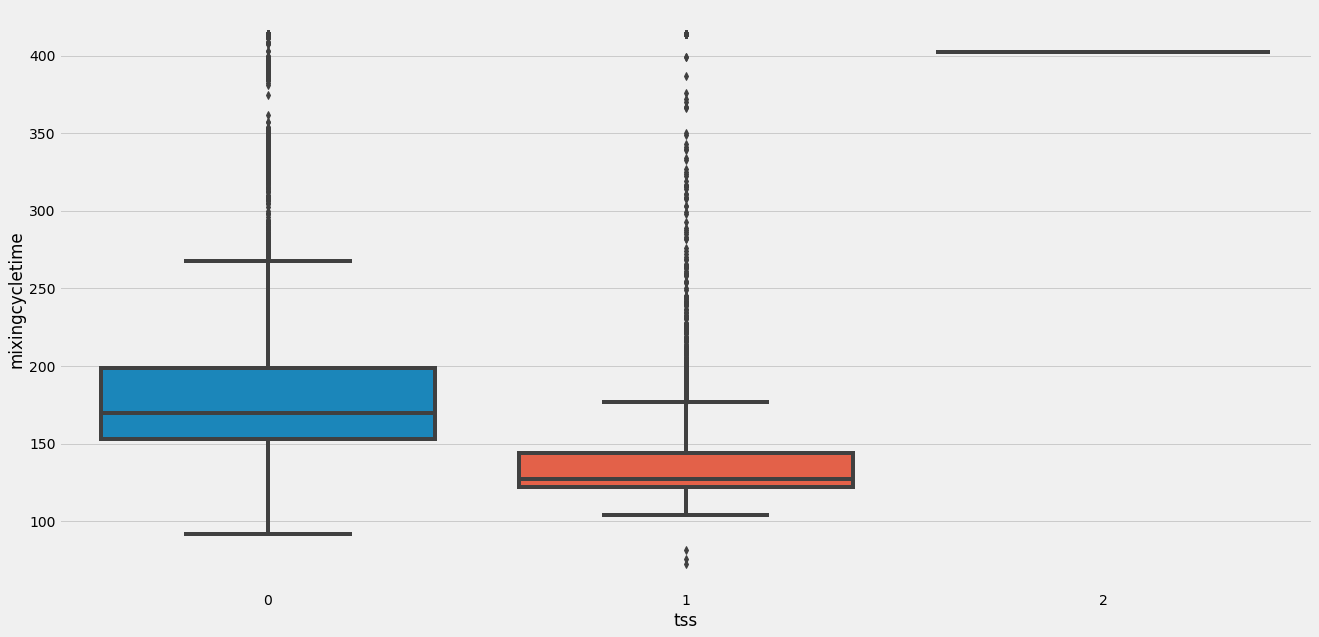

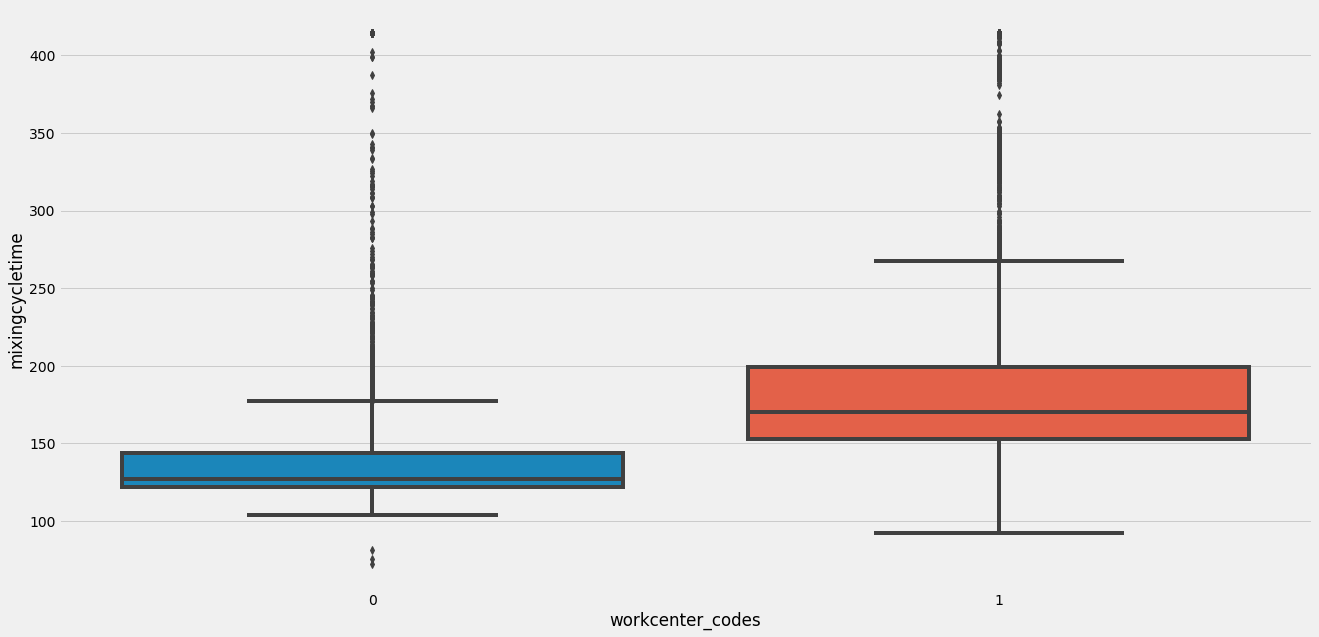

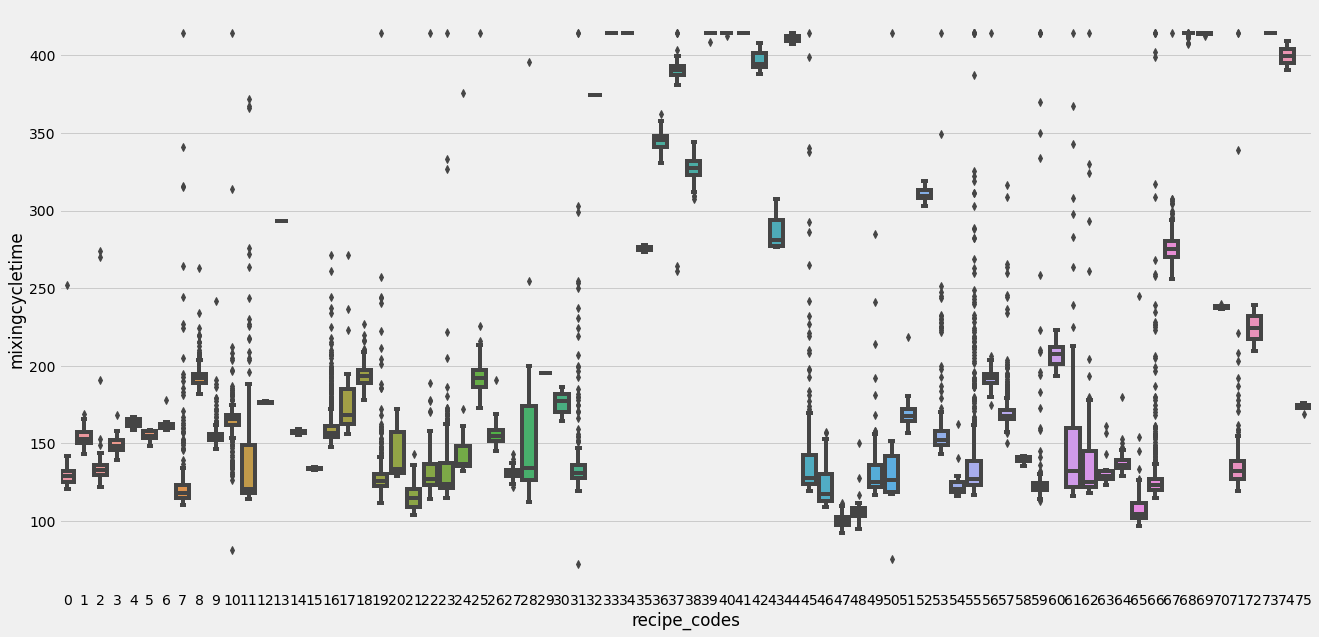

In [144]:

for i, col in enumerate(cat_feats):
    plt.figure(i,figsize=(20,10))
    sns.boxplot(col,data["mixingcycletime"],data=data)